# Business Objectives

### This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

### Analysis of Application_Data

#### Loading data and normal routine check

In [2]:
# Importing all the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_row',500)
pd.set_option('display.max_column',500)

In [3]:
# Reading dataset from local
df=pd.read_csv('application_data.csv')
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Determining the shape of the datset
df.shape

(307511, 122)

In [5]:
# Determining the info of the datset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
# Determining the shape of the datset
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
# now we can understand .what type of data  and number of count value.
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

#### Checking Distribution of Target Variable

In [8]:
defaulters=df[df.TARGET==1]
nondefaulters=df[df.TARGET==0]

C:\Users\girik\.anaconda\anaconnda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

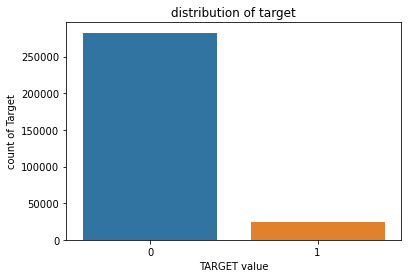

In [9]:
sns.countplot(df.TARGET)
plt.xlabel('TARGET value')
plt.ylabel('count of Target')
plt.title('distribution of target')
plt.show


In [10]:
percentage_defaulters=(len(defaulters)*100)/len(df)
percentage_nondefaulters=(len(nondefaulters)*100)/len(df)

print('persentage of people who have paid there loan is' ,round(percentage_nondefaulters,2),"%")
print("persentage of people who have Not paid there loan is" , round(percentage_defaulters,2),"%")
print("The Ratio of Data Imbalance is:",round(len(nondefaulters)/len(defaulters),2))


persentage of people who have paid there loan is 91.93 %
persentage of people who have Not paid there loan is 8.07 %
The Ratio of Data Imbalance is: 11.39


#### Identifying missing values in each column

In [11]:
def meta_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [12]:
df1=meta_data(df)
df1.head(20)

,Total,Percent,Unique,Data_Type
COMMONAREA_MEDI,214865,69.872297,3202,float64
COMMONAREA_AVG,214865,69.872297,3181,float64
COMMONAREA_MODE,214865,69.872297,3128,float64
NONLIVINGAPARTMENTS_MODE,213514,69.432963,167,float64
NONLIVINGAPARTMENTS_AVG,213514,69.432963,386,float64
NONLIVINGAPARTMENTS_MEDI,213514,69.432963,214,float64
FONDKAPREMONT_MODE,210295,68.386172,4,object
LIVINGAPARTMENTS_MODE,210199,68.354953,736,float64
LIVINGAPARTMENTS_AVG,210199,68.354953,1868,float64
LIVINGAPARTMENTS_MEDI,210199,68.354953,1097,float64


#### Dropping columns with High Missing Values

In [13]:
#dropping columns with more than 57% missing values 
#Selected 57% because we don't want to drop EXT_SOURCE_1 which is an important variable
cols_to_keep=list(df1[(df1.Percent<40)].index)
df=df[cols_to_keep]
df.describe()

,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CNT_CHILDREN,FLAG_DOCUMENT_8,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR
count,246546.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,306490.000000,306490.000000,306490.000000,306490.000000,3.068510e+05,3.072330e+05,307499.000000,307509.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.510853,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,1.422245,0.143421,1.405292,0.100049,5.143927e-01,5.383962e+05,27108.573909,2.152665,-962.858788,0.417052,0.081376,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.003896,0.000335,0.000023,0.003912,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000007,5.990260e+05,1.687979e+05,0.281066,0.179555,0.230454,0.080729,0.078173,0.040659,0.050769,0.015144,12.063419,2.031521,2.052463,0.056720,0.998133,0.199368,0.819889,0.999997,-2994.202373,-4986.120328,63815.045904,-16036.995067,0.020868,278180.518577
std,0.194844,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,2.400989,0.446698,2.379803,0.362291,1.910602e-01,3.694465e+05,14493.737315,0.910682,826.808487,0.722121,0.273412,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.062295,0.018299,0.004771,0.062424,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.002550,4.024908e+05,2.371231e+05,0.449521,0.383817,0.421124,0.272419,0.268444,0.197499,0.219526,0.122126,3.265832,0.502737,0.509034,0.231307,0.043164,0.399526,0.384280,0.001803,1509.450419,3522.886321,141275.766519,4363.988632,0.013831,102790.175348
min,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,4.050000e+04,1615.500000,1.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000e+04,2.565000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7197.000000,-24672.000000,-17912.000000,-25229.000000,0.000290,100002.000000
25%,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,2.385000e+05,16524.000000,2.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [14]:
#Checking columns with very less missing values
low_missing=pd.DataFrame(df1[(df1.Percent>0)&(df1.Percent<15)])
low_missing

,Total,Percent,Unique,Data_Type
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631,5,float64
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631,9,float64
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631,9,float64
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631,24,float64
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631,11,float64
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631,25,float64
NAME_TYPE_SUITE,1292,0.420148,7,object
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021,10,float64
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64


In [15]:
df.select_dtypes('object').columns

Index(['OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'NAME_HOUSING_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'],
      dtype='object')

In [16]:
df.select_dtypes('float64').columns

Index(['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
       'REGION_POPULATION_RELATIVE'],
      dtype='object')

In [17]:
df.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'FLAG_PHONE',
       'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'TARGET',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION',
       'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR'],
      dtype='object')

#### A lot of the int columns look like Flags, let check their unique values

In [18]:
df.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

CNT_CHILDREN                       15
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_21                    2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_12                    2
FLAG_PHONE                          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
TARGET                              2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_

#### Notice a lot of "int" columns have 2 unique values. These are flags or Flag type varibles. Which have no use in bivariate analysis. These can be converted to Yes/No values for categorical analysis.

In [19]:
cols_to_convert=list(df1[(df1.Unique==2)&(df1.Data_Type=="int64")].index)

#function to conver columns
def convert_data(df, cols_to_convert):
    for y in cols_to_convert:
        df.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return df

#calling the function for application_data
convert_data(df, cols_to_convert)
df.TARGET.replace(('N', 'Y'), (0, 1), inplace=True)
df.dtypes.value_counts()

object     44
float64    20
int64       9
dtype: int64

#### Univariate Analyis on Categorical Columns

In [20]:
defaulters=df[df.TARGET==1]

nondefaulters=df[df.TARGET==0]

#### Getting a list of columns with dtype=object, to identify columns for categorical analysis

In [21]:
df.select_dtypes('object').columns

Index(['OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'FLAG_DOCUMENT_8',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_LIVE_REGION', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_EMAIL', 'FLAG_CONT_MOBILE', 'ORGANIZATION_TYPE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'NAME_HOUSING_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_I

In [22]:
def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=defaulters[var], data=defaulters, order= defaulters[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=nondefaulters[var], data=nondefaulters, order= nondefaulters[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
plt.show()

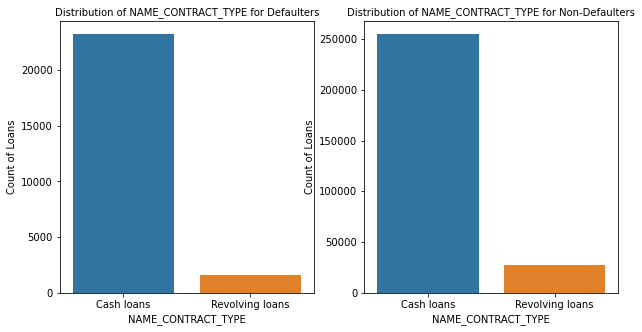

In [23]:
plot_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

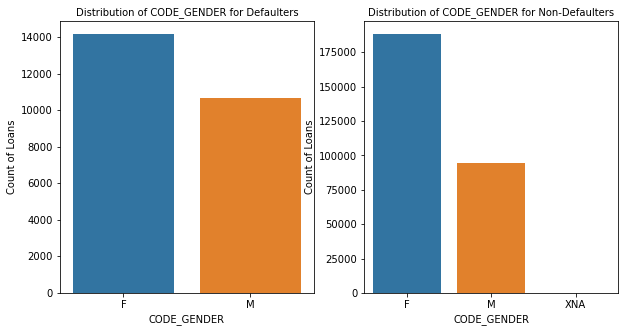

In [24]:
plot_charts('CODE_GENDER', label_rotation=False,horizontal_layout=True)

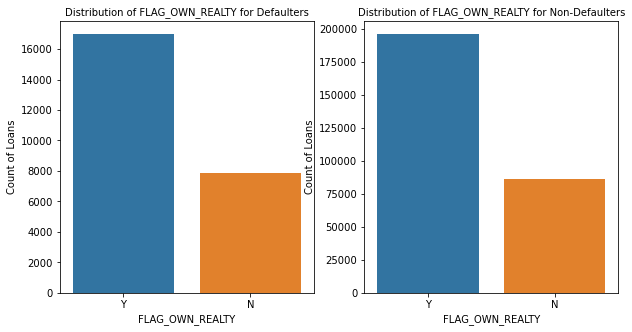

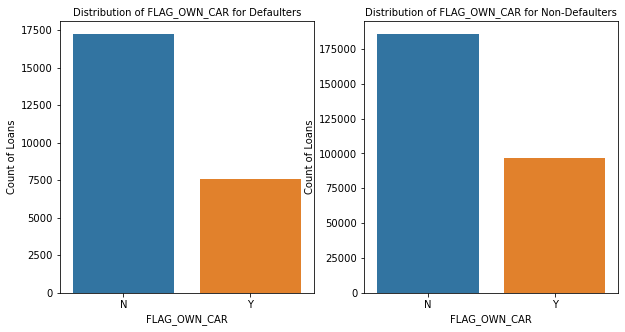

In [25]:
plot_charts('FLAG_OWN_REALTY', label_rotation=False,horizontal_layout=True)
plot_charts('FLAG_OWN_CAR', label_rotation=False,horizontal_layout=True)

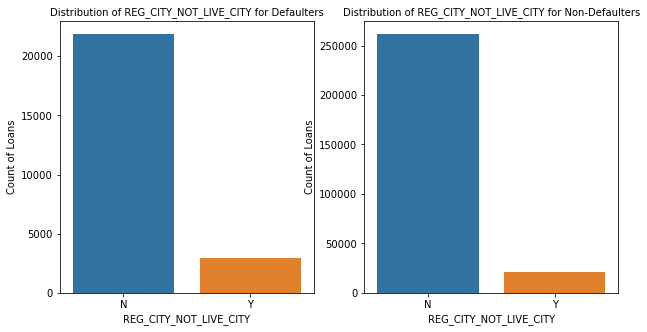

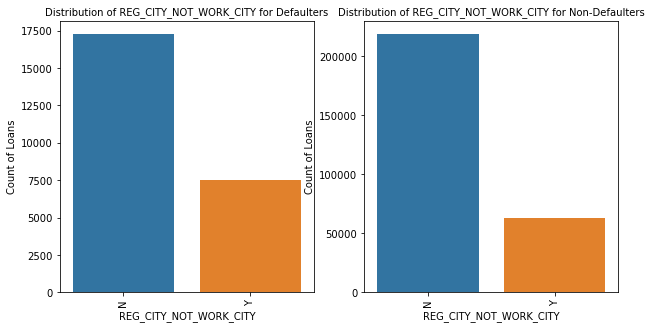

In [26]:
plot_charts('REG_CITY_NOT_LIVE_CITY', label_rotation=False,horizontal_layout=True)
plot_charts('REG_CITY_NOT_WORK_CITY', label_rotation=True,horizontal_layout=True)

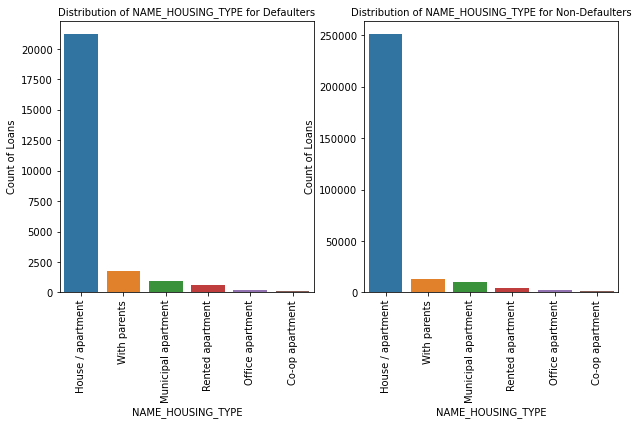

In [27]:
plot_charts('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)

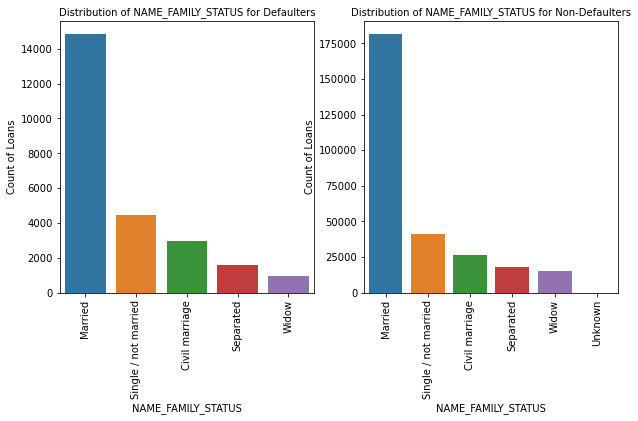

In [28]:
plot_charts('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)

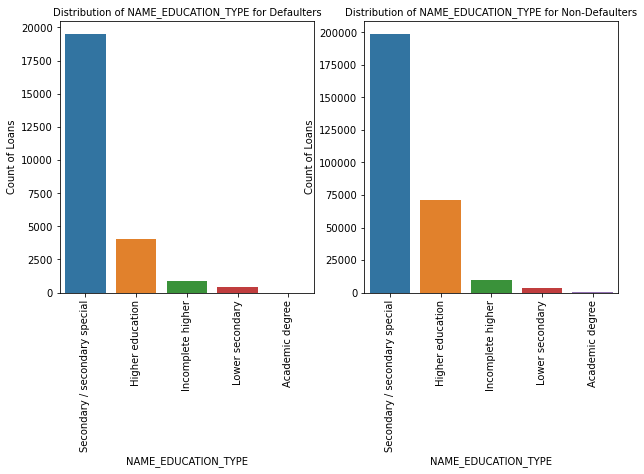

In [29]:
plot_charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)

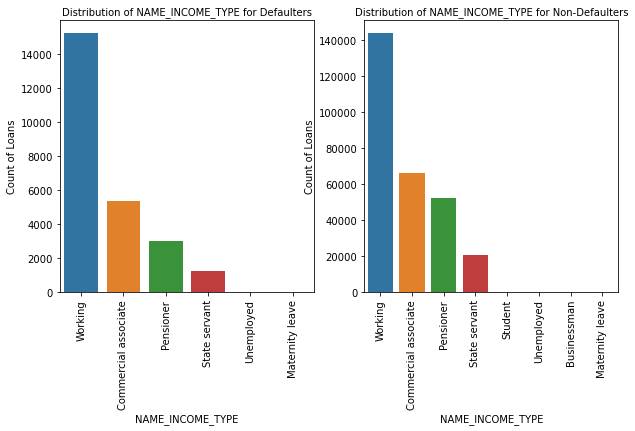

In [30]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

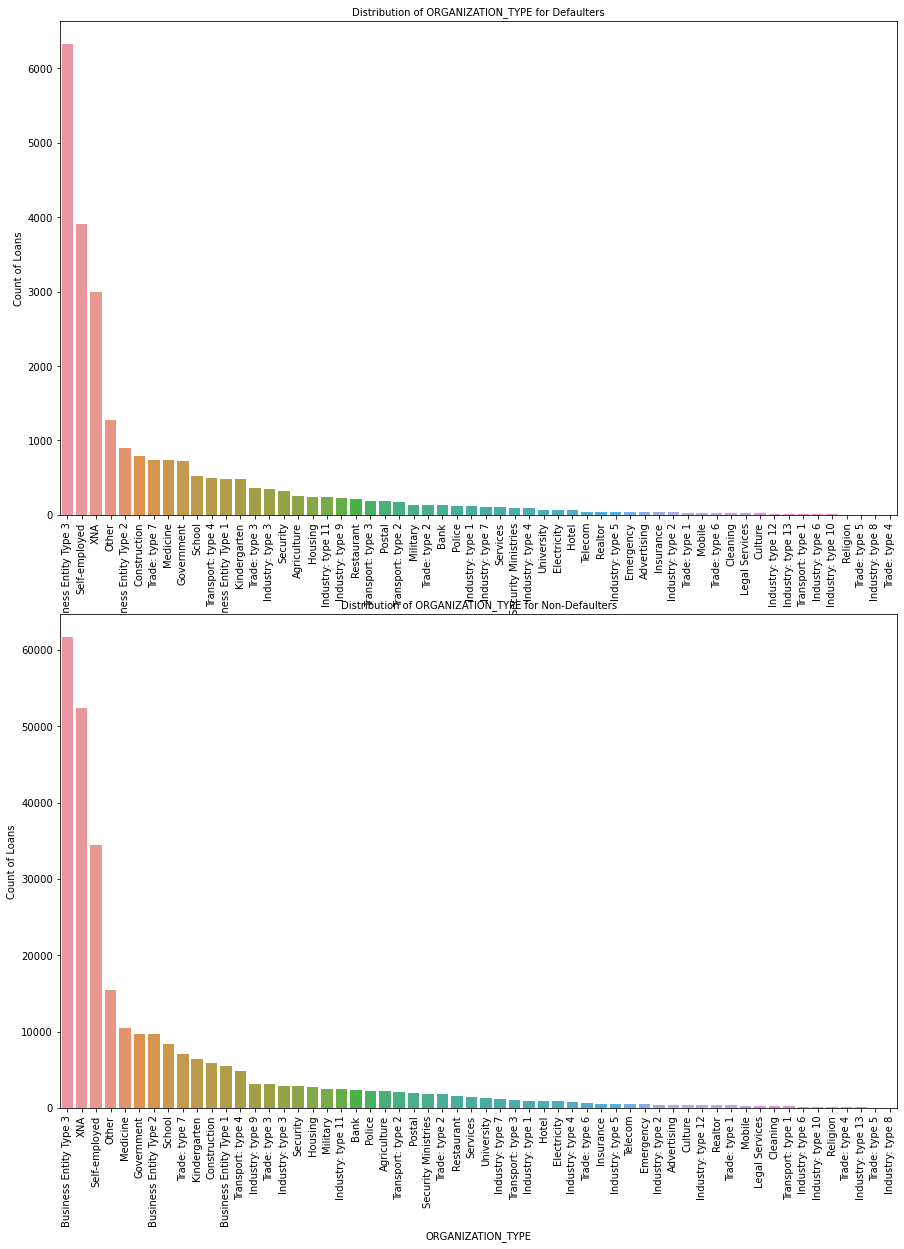

In [31]:
plot_charts('ORGANIZATION_TYPE', label_rotation=True,horizontal_layout=False)

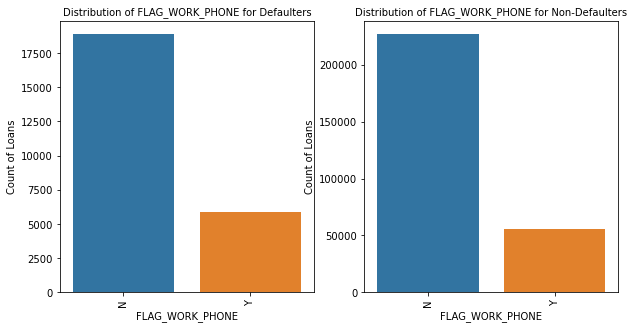

In [32]:
plot_charts('FLAG_WORK_PHONE', label_rotation=True,horizontal_layout=True)

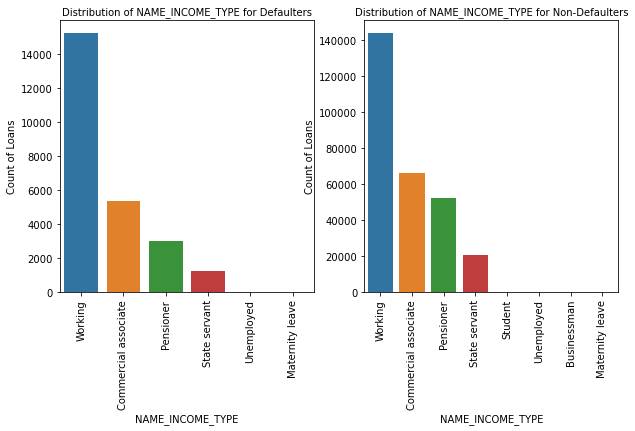

In [33]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

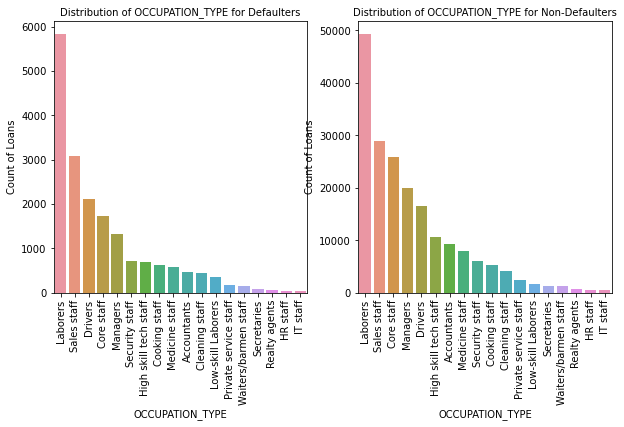

In [34]:
plot_charts('OCCUPATION_TYPE', label_rotation=True,horizontal_layout=True)

#### Univariate & Bivariate Analyis on Numeric Columns

In [35]:
df.select_dtypes('float64').columns

Index(['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
       'REGION_POPULATION_RELATIVE'],
      dtype='object')

In [36]:
df.select_dtypes('int64').columns

Index(['CNT_CHILDREN', 'TARGET', 'HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'SK_ID_CURR'],
      dtype='object')

#### REMOVING OUTLIERS

In [37]:
def plot_boxhist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=defaulters[var]);
    plt.title('Box Plot of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=defaulters[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulters', fontsize=10)
plt.show()

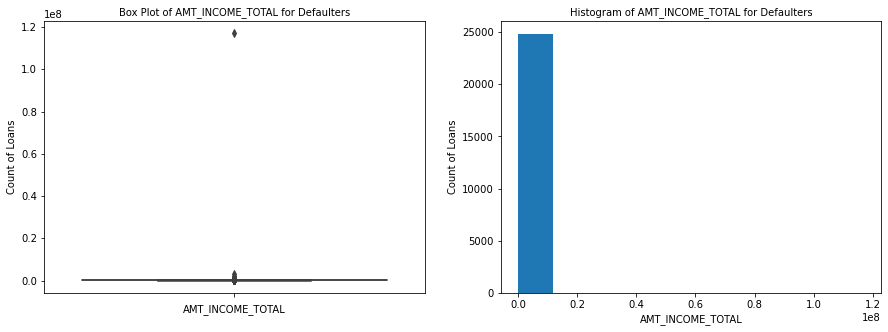

In [38]:
plot_boxhist('AMT_INCOME_TOTAL')

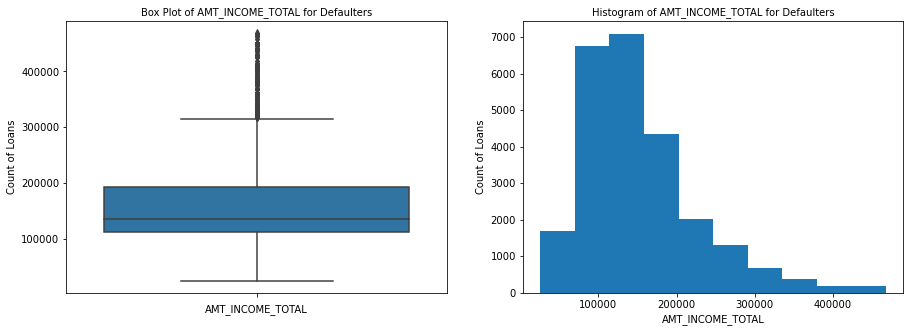

In [39]:
df=df[df.AMT_INCOME_TOTAL<np.nanpercentile(df['AMT_INCOME_TOTAL'], 99)]

#update dataframes
defaulters=df[df.TARGET==1] 
nondefaulters=df[df.TARGET==0]

plot_boxhist('AMT_INCOME_TOTAL')

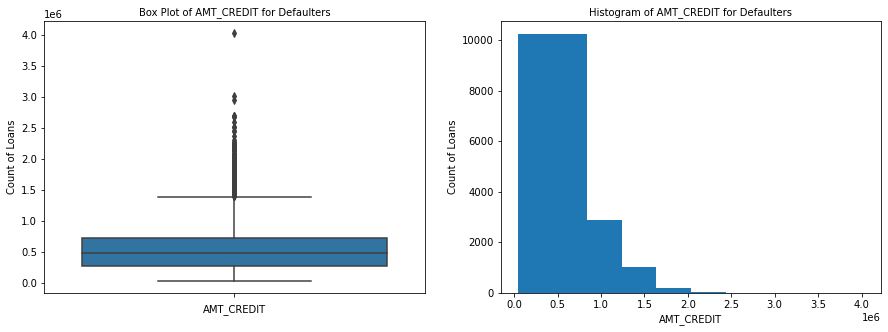

In [40]:
plot_boxhist('AMT_CREDIT')

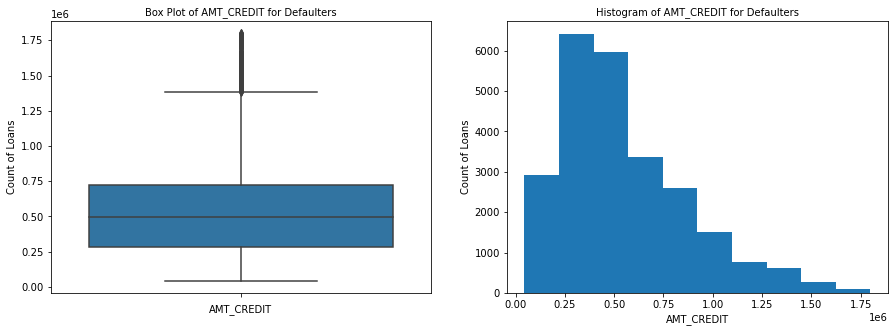

In [41]:
df=df[df.AMT_CREDIT<np.nanpercentile(df['AMT_CREDIT'], 99)]

#update dataframes
defaulters=df[df.TARGET==1] 
nondefaulters=df[df.TARGET==0]

plot_boxhist('AMT_CREDIT')

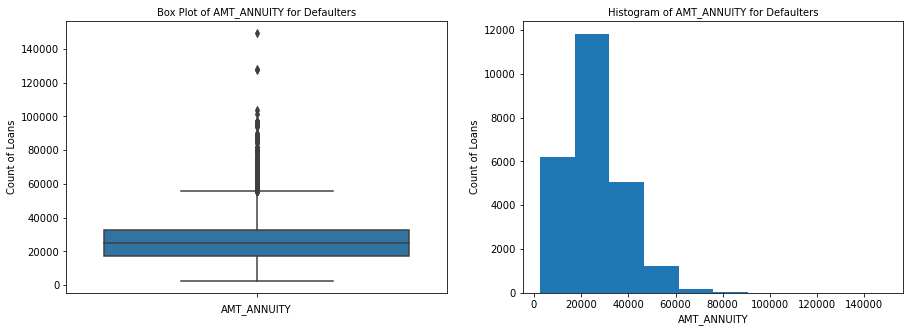

In [42]:
plot_boxhist('AMT_ANNUITY')

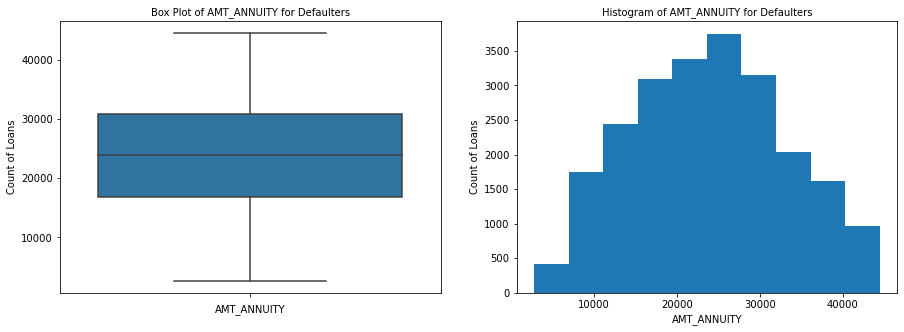

In [43]:
df=df[df.AMT_ANNUITY<np.nanpercentile(df['AMT_ANNUITY'], 90)]

#update dataframes
defaulters=df[df.TARGET==1] 
nondefaulters=df[df.TARGET==0]

plot_boxhist('AMT_ANNUITY')

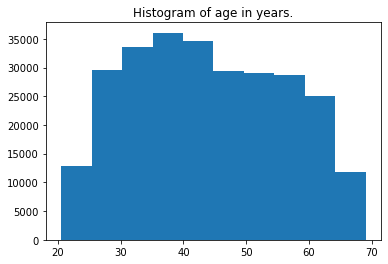

In [44]:
df['AGE'] = df['DAYS_BIRTH'] / -365
plt.hist(df['AGE']);
plt.title('Histogram of age in years.');

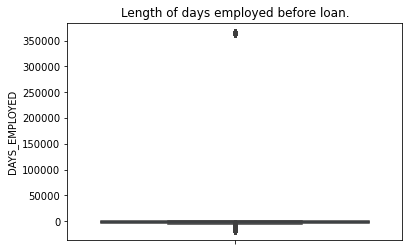

In [45]:
sns.boxplot(y=df['DAYS_EMPLOYED']);
plt.title('Length of days employed before loan.');

In [46]:
df['DAYS_EMPLOYED'].describe()

count    270624.000000
mean      66967.610744
std      143809.691359
min      -17912.000000
25%       -2690.000000
50%       -1165.000000
75%        -258.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [47]:
df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].replace(365243, np.nan)
df['DAYS_EMPLOYED'].describe()

count    219590.000000
mean      -2353.333813
std        2333.721637
min      -17912.000000
25%       -3126.000000
50%       -1612.000000
75%        -749.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [48]:
df['YEARS_EMPLOYED'] = (df['DAYS_EMPLOYED']/-365)

#update dataframes
defaulters=df[df.TARGET==1] 
nondefaulters=df[df.TARGET==0]

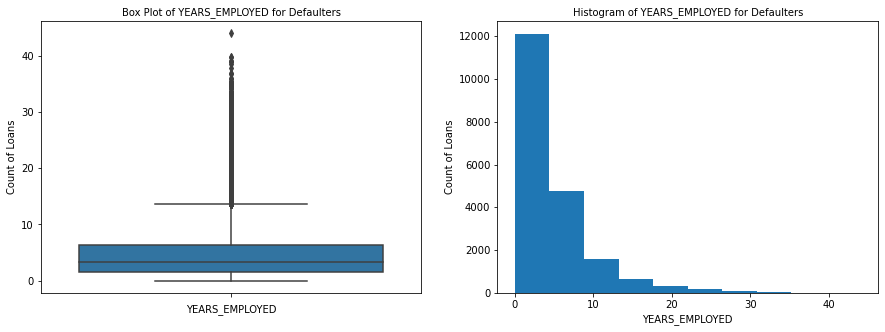

In [49]:
plot_boxhist('YEARS_EMPLOYED')

In [50]:
df.groupby(['NAME_INCOME_TYPE']).agg({'YEARS_EMPLOYED': ['mean', 'median', 'count', 'max'], 'AGE': ['median']})

YEARS_EMPLOYED                                     AGE
                               mean    median   count        max     median
NAME_INCOME_TYPE                                                           
Businessman                5.544292  4.838356       3   7.175342  52.487671
Commercial associate       5.730061  4.010959   58866  48.071233  39.413699
Maternity leave            6.453425  6.260274       4   9.942466  37.649315
Pensioner                 13.550137  7.673973      10  35.246575  60.506849
State servant              9.276139  7.008219   18445  48.172603  40.482192
Student                    6.765582  4.954795      16  21.931507  41.215068
Unemployed                      NaN       NaN       0        NaN  46.832877
Working                    6.377079  4.347945  142246  49.073973  39.679452

In [51]:
df.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count', 'max']})

AMT_INCOME_TOTAL            \
                                                               mean    median   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                                  
Academic degree               Commercial associate    230700.000000  225000.0   
                              Pensioner               163620.000000  135000.0   
                              State servant           230062.500000  198000.0   
                              Working                 206100.000000  180000.0   
Higher education              Businessman             195000.000000  180000.0   
                              Commercial associate    201003.446086  180000.0   
                              Maternity leave         112500.000000  112500.0   
                              Pensioner               151193.659642  135000.0   
                              State servant           183217.739153  171000.0   
                              Student                 164700.000000  171000.0   
                              Unemployed              204300.000000  225000.0   
                              Working                 173712.264383  157500.0   
Incomplete higher             Commercial associate    182876.896934  164623.5   
                              Pensioner               141442.696352  135000.0   
                              State servant           165287.840000  157500.0   
                              Student                 157500.000000  157500.0   
                              Unemployed              126000.000000   63000.0   
                              Working                 158877.631087  135000.0   
Lower secondary               Commercial associate    157017.140515  135000.0   
                              Pensioner               103467.097166   90000.0   
                              State servant           135703.125000  112500.0   
                              Working                 134821.250000  126000.0   
Secondary / secondary special Commercial associate    167227.792605  157500.0   
                              Maternity leave          58500.000000   58500.0   
                              Pensioner               124717.747472  112500.0   
                              State servant           149828.084681  135000.0   
                              Student                 130050.000000  128250.0   
                              Unemployed               70322.727273   63000.0   
                              Working                 145718.602949  135000.0   

                                                                      
                                                     count       max  
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                        
Academic degree               Commercial associate      30  450000.0  
                              Pensioner                 20  315000.0  
                              State servant             16  450000.0  
                              Working                   60  450000.0  
Higher education              Businessman                3  225000.0  
                              Commercial associate   17990  468000.0  
                              Maternity leave            2  135000.0  
                              Pensioner               6893  450000.0  
                              State servant           7065  450000.0  
                              Student                    5  225000.0  
                              Unemployed                 5  337500.0  
                              Working                28213  463500.0  
Incomplete higher             Commercial associate    2838  468823.5  
                              Pensioner                466  450000.0  
                              State servant            675  450000.0  
                              Student                    1  157500.0  
                              Unemployed                 3  270000.0  
                              Working 

#### Binning of Continuous Variables

In [52]:
df['AMT_INCOME_TOTAL'].describe()

count    270624.000000
mean     153723.159193
std       70918.773625
min       25650.000000
25%      108000.000000
50%      135000.000000
75%      180000.000000
max      468823.500000
Name: AMT_INCOME_TOTAL, dtype: float64

In [53]:
defaulters.loc[:,'INCOME_BRACKET']=pd.qcut(df.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'INCOME_BRACKET']=pd.qcut(df.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])

C:\Users\girik\AppData\Local\Temp\ipykernel_2052\1156685268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulters.loc[:,'INCOME_BRACKET']=pd.qcut(df.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])
C:\Users\girik\AppData\Local\Temp\ipykernel_2052\1156685268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nondefaulters.loc[:,'INCOME_BRACKET']=pd.qcut(df.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Me

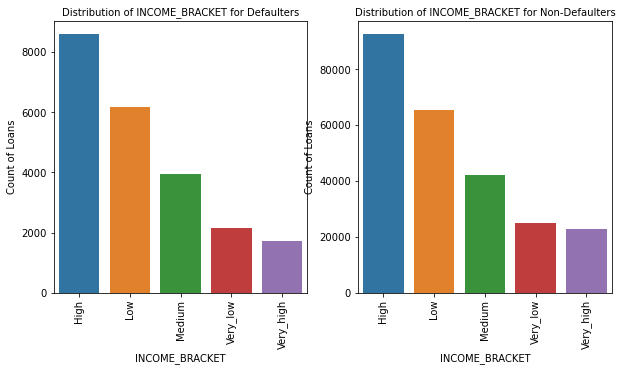

In [54]:
plot_charts('INCOME_BRACKET', label_rotation=True,horizontal_layout=True)

In [55]:
defaulters.loc[:,'Rating1']=pd.cut(df.loc[:,'EXT_SOURCE_3'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'Rating1']=pd.cut(df.loc[:,'EXT_SOURCE_3'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])

C:\Users\girik\AppData\Local\Temp\ipykernel_2052\337181407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulters.loc[:,'Rating1']=pd.cut(df.loc[:,'EXT_SOURCE_3'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
C:\Users\girik\AppData\Local\Temp\ipykernel_2052\337181407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nondefaulters.loc[:,'Rating1']=pd.cut(df.loc[:,'EXT_SOURCE_3'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])


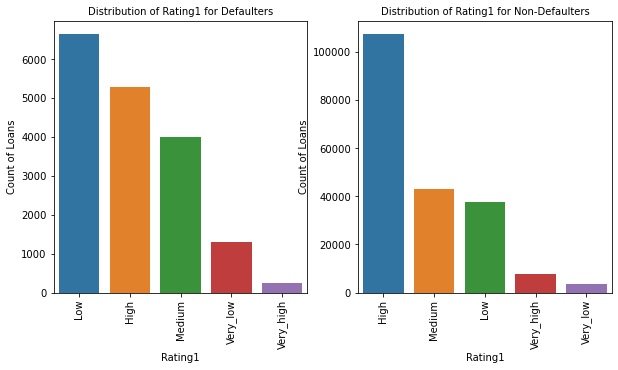

In [56]:
plot_charts('Rating1', label_rotation=True,horizontal_layout=True)


In [57]:
defaulters.loc[:,'Rating2']=pd.cut(df.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'Rating2']=pd.cut(df.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])

C:\Users\girik\AppData\Local\Temp\ipykernel_2052\4012960910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulters.loc[:,'Rating2']=pd.cut(df.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
C:\Users\girik\AppData\Local\Temp\ipykernel_2052\4012960910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nondefaulters.loc[:,'Rating2']=pd.cut(df.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])


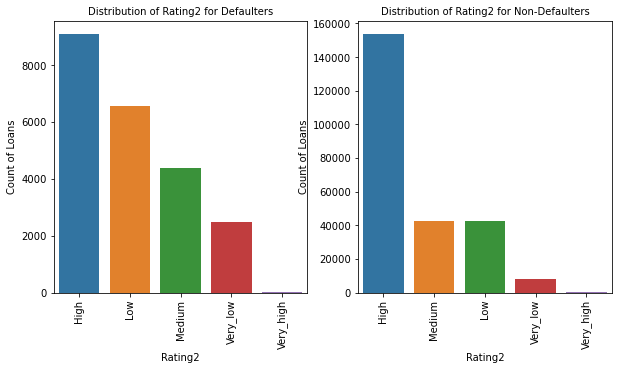

In [58]:
plot_charts('Rating2', label_rotation=True,horizontal_layout=True)

In [59]:
defaulters.loc[:,'Rating3']=pd.cut(df.loc[:,'EXT_SOURCE_3'], [0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'Rating3']=pd.cut(df.loc[:,'EXT_SOURCE_3'], [0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])

C:\Users\girik\AppData\Local\Temp\ipykernel_2052\1795403424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulters.loc[:,'Rating3']=pd.cut(df.loc[:,'EXT_SOURCE_3'], [0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
C:\Users\girik\AppData\Local\Temp\ipykernel_2052\1795403424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nondefaulters.loc[:,'Rating3']=pd.cut(df.loc[:,'EXT_SOURCE_3'], [0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])

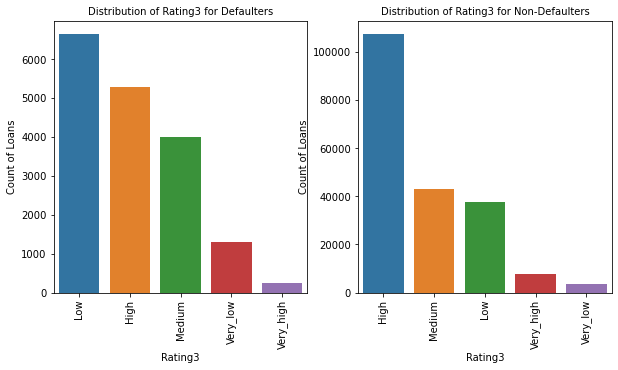

In [60]:
plot_charts('Rating3', label_rotation=True,horizontal_layout=True)

In [61]:
defaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(df.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,0.1], labels=['Low','Medium','High','Very_High'])
nondefaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(df.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,1], labels=['Low','Medium','High','Very_High'])

C:\Users\girik\AppData\Local\Temp\ipykernel_2052\4134161308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(df.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,0.1], labels=['Low','Medium','High','Very_High'])
C:\Users\girik\AppData\Local\Temp\ipykernel_2052\4134161308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nondefaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(df.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,1], labels=['Low','Medium','High','Very_High'])


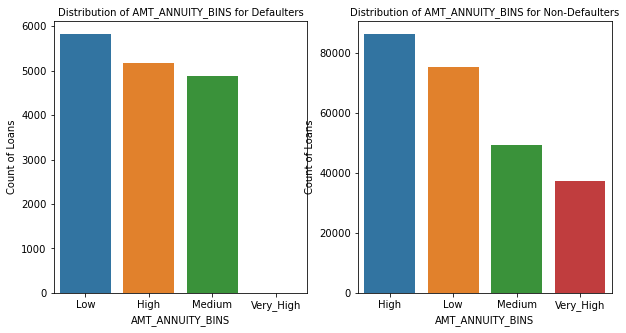

In [62]:
plot_charts('AMT_ANNUITY_BINS', label_rotation=False,horizontal_layout=True)

In [63]:
age_data = df.loc[:,['TARGET', 'DAYS_BIRTH']]
age_data.loc[:,'YEARS_BIRTH'] = df.loc[:,'DAYS_BIRTH']/ -365
# Bin the age data
age_data.loc[:,'YEARS_BINNED'] = pd.cut(age_data.loc[:,'YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,-9461,25.920548,"(25.0, 30.0]"
1,0,-16765,45.931507,"(45.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 55.0]"
3,0,-19005,52.068493,"(50.0, 55.0]"
4,0,-19932,54.608219,"(50.0, 55.0]"
5,0,-16941,46.413699,"(45.0, 50.0]"
6,0,-13778,37.747945,"(35.0, 40.0]"
7,0,-18850,51.643836,"(50.0, 55.0]"
8,0,-20099,55.065753,"(55.0, 60.0]"
9,0,-14469,39.641096,"(35.0, 40.0]"


In [64]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123634,-8526.531171,23.360359
"(25.0, 30.0]",0.114012,-10149.579304,27.807067
"(30.0, 35.0]",0.106704,-11852.848779,32.473558
"(35.0, 40.0]",0.092880,-13705.912891,37.550446
"(40.0, 45.0]",0.082295,-15495.702723,42.453980
"(45.0, 50.0]",0.077458,-17326.817002,47.470732
"(50.0, 55.0]",0.069519,-19200.394964,52.603822
"(55.0, 60.0]",0.057357,-20987.323723,57.499517
"(60.0, 65.0]",0.054386,-22782.049911,62.416575


In [ ]:
plt.figure(figsize = (8, 4))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

#### Bi-Variate Analysis of Variables


In [66]:

cols=['EXT_SOURCE_3', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE','CNT_CHILDREN', 'HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH']

In [67]:
defaulters_1=defaulters[cols]
defaulters_correlation = defaulters_1.corr()
round(defaulters_correlation, 3)

,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,CNT_CHILDREN,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH
EXT_SOURCE_3,1.000,0.077,0.080,0.030,-0.021,-0.066,0.079,-0.071,-0.086,-0.007,-0.020,-0.046,0.001,0.003,-0.128,-0.090,-0.175
EXT_SOURCE_2,0.077,1.000,0.107,0.081,0.000,-0.207,0.096,0.124,-0.068,0.157,-0.013,0.130,-0.236,-0.238,-0.061,-0.095,-0.109
AMT_GOODS_PRICE,0.080,0.107,1.000,0.741,0.048,-0.114,0.978,0.277,-0.038,0.060,-0.008,0.039,-0.053,-0.047,-0.056,-0.115,-0.144
AMT_ANNUITY,0.030,0.081,0.741,1.000,0.075,-0.071,0.757,0.341,0.031,0.032,0.031,0.021,-0.044,-0.034,-0.014,-0.047,-0.016
CNT_FAM_MEMBERS,-0.021,0.000,0.048,0.075,1.000,-0.012,0.052,-0.002,0.146,-0.033,0.884,-0.026,0.052,0.045,-0.025,-0.003,0.208
DAYS_LAST_PHONE_CHANGE,-0.066,-0.207,-0.114,-0.071,-0.012,1.000,-0.104,-0.082,0.070,-0.055,0.010,-0.021,0.018,0.017,0.128,0.169,0.111
AMT_CREDIT,0.079,0.096,0.978,0.757,0.052,-0.104,1.000,0.279,-0.038,0.053,0.000,0.025,-0.047,-0.039,-0.052,-0.108,-0.143
AMT_INCOME_TOTAL,-0.071,0.124,0.277,0.341,-0.002,-0.082,0.279,1.000,0.033,0.092,-0.007,0.077,-0.161,-0.148,-0.002,-0.027,0.004
DAYS_REGISTRATION,-0.086,-0.068,-0.038,0.031,0.146,0.070,-0.038,0.033,1.000,-0.055,0.149,-0.031,0.105,0.107,0.101,0.138,0.293
REGION_POPULATION_RELATIVE,-0.007,0.157,0.060,0.032,-0.033,-0.055,0.053,0.092,-0.055,1.000,-0.034,0.130,-0.421,-0.417,-0.011,-0.017,-0.051


In [68]:
defaulters_correlation.head(10).index

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_ANNUITY',
       'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE'],
      dtype='object')

In [69]:
c1=defaulters_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

EXT_SOURCE_3          EXT_SOURCE_3                   1.000000
AMT_CREDIT            AMT_GOODS_PRICE                0.978079
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY    0.961097
CNT_CHILDREN          CNT_FAM_MEMBERS                0.883502
AMT_CREDIT            AMT_ANNUITY                    0.756598
AMT_GOODS_PRICE       AMT_ANNUITY                    0.741243
AMT_INCOME_TOTAL      AMT_ANNUITY                    0.340531
DAYS_BIRTH            DAYS_EMPLOYED                  0.307737
                      DAYS_REGISTRATION              0.292698
AMT_INCOME_TOTAL      AMT_CREDIT                     0.278920
dtype: float64

In [70]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

REGION_RATING_CLIENT         AMT_INCOME_TOTAL              -0.147914
REGION_RATING_CLIENT_W_CITY  AMT_INCOME_TOTAL              -0.161089
EXT_SOURCE_3                 DAYS_BIRTH                    -0.174677
EXT_SOURCE_2                 DAYS_LAST_PHONE_CHANGE        -0.207268
                             REGION_RATING_CLIENT_W_CITY   -0.236492
                             REGION_RATING_CLIENT          -0.238035
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT_W_CITY   -0.275065
                             REGION_RATING_CLIENT          -0.291574
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT          -0.417374
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE    -0.421099
dtype: float64

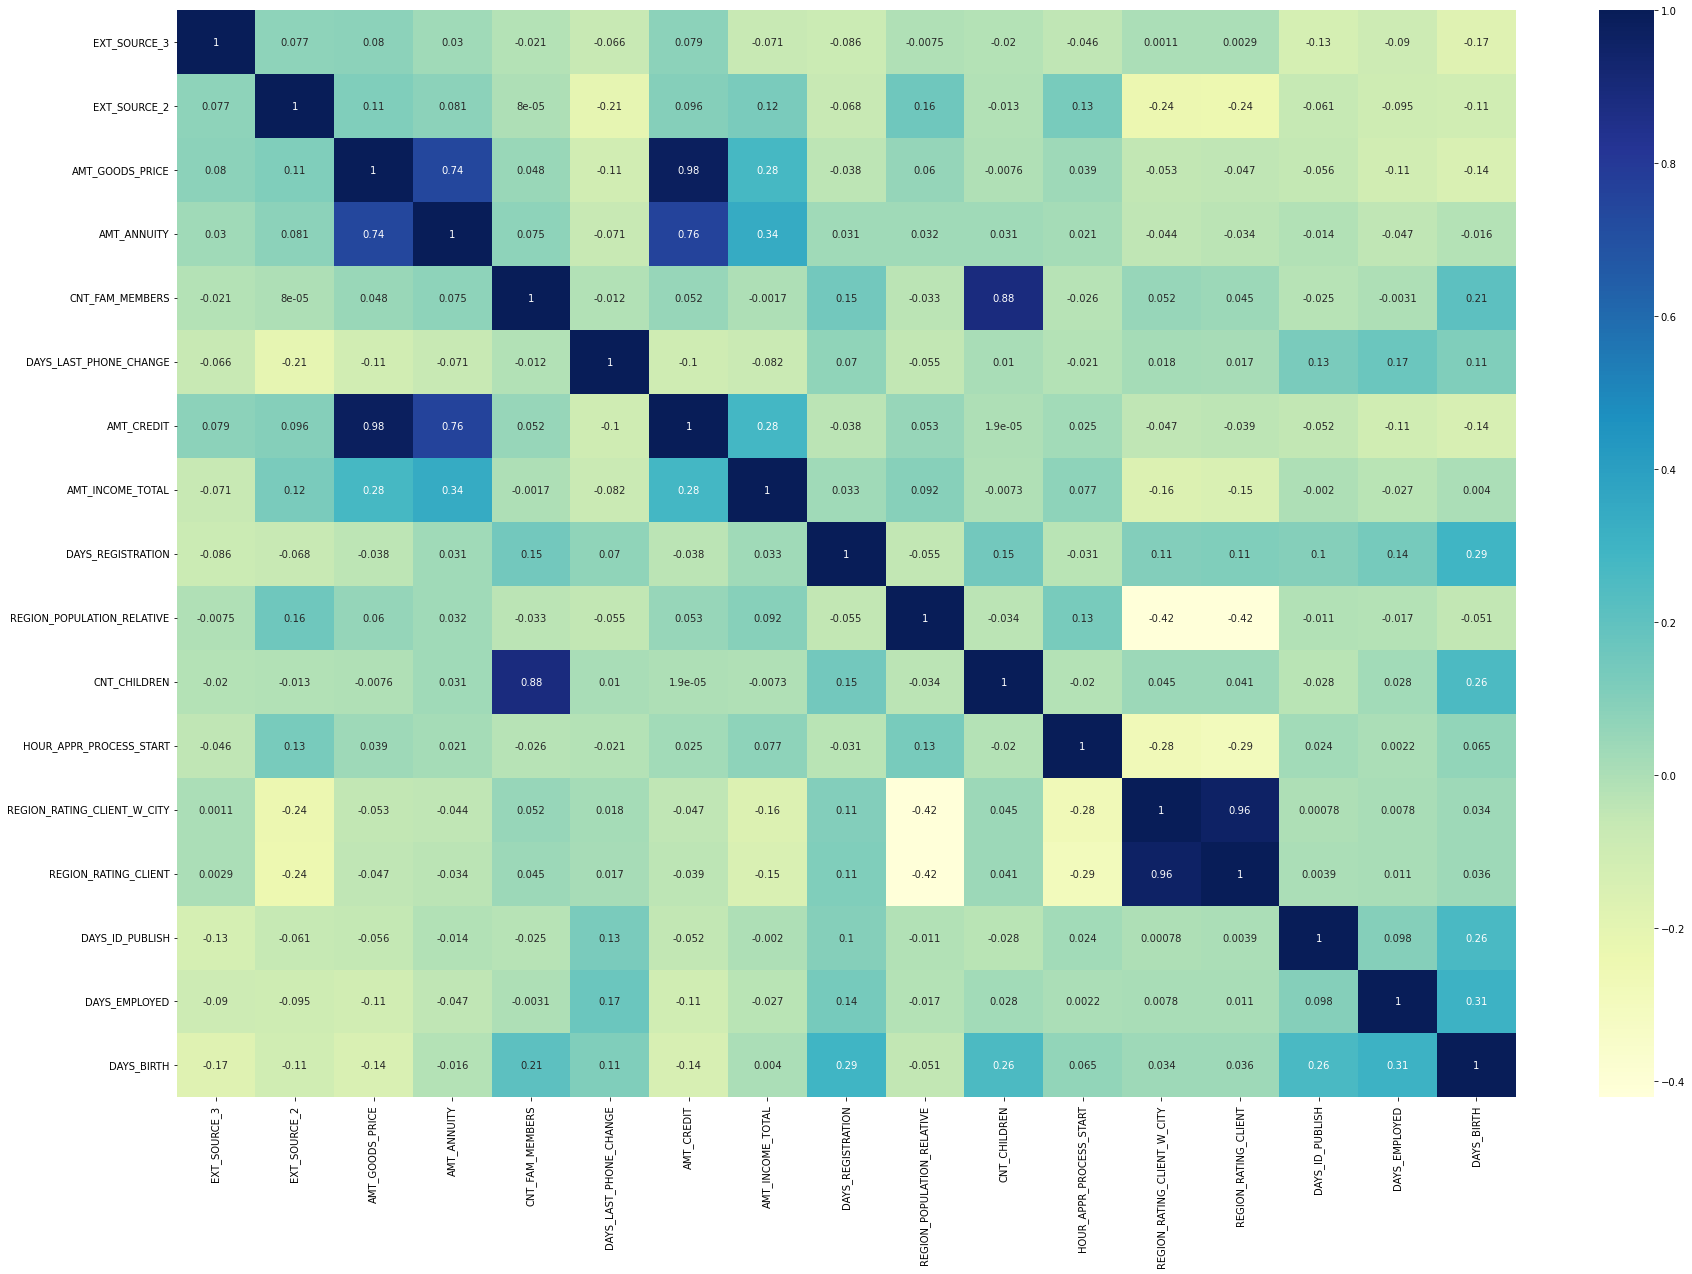

In [71]:
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(defaulters_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [72]:
nondefaulters_1=nondefaulters[cols]
nondefaulters_correlation = nondefaulters_1.corr()
round(nondefaulters_correlation, 3)

,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,CNT_CHILDREN,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH
EXT_SOURCE_3,1.000,0.083,0.021,0.002,-0.028,-0.070,0.019,-0.102,-0.105,-0.009,-0.042,-0.045,-0.005,-0.007,-0.128,-0.120,-0.202
EXT_SOURCE_2,0.083,1.000,0.102,0.088,-0.003,-0.189,0.094,0.146,-0.053,0.180,-0.015,0.152,-0.271,-0.275,-0.042,-0.081,-0.078
AMT_GOODS_PRICE,0.021,0.102,1.000,0.777,0.057,-0.077,0.982,0.311,0.005,0.051,-0.003,0.050,-0.054,-0.050,-0.005,-0.087,-0.049
AMT_ANNUITY,0.002,0.088,0.777,1.000,0.074,-0.067,0.788,0.374,0.032,0.059,0.021,0.036,-0.082,-0.073,0.017,-0.047,0.015
CNT_FAM_MEMBERS,-0.028,-0.003,0.057,0.074,1.000,-0.030,0.058,0.033,0.179,-0.025,0.876,-0.010,0.032,0.030,-0.017,0.031,0.290
DAYS_LAST_PHONE_CHANGE,-0.070,-0.189,-0.077,-0.067,-0.030,1.000,-0.074,-0.058,0.052,-0.039,-0.009,-0.014,0.020,0.021,0.087,0.137,0.075
AMT_CREDIT,0.019,0.094,0.982,0.788,0.058,-0.074,1.000,0.310,0.002,0.047,0.001,0.040,-0.054,-0.049,-0.003,-0.086,-0.051
AMT_INCOME_TOTAL,-0.102,0.146,0.311,0.374,0.033,-0.058,0.310,1.000,0.076,0.153,0.031,0.084,-0.207,-0.189,0.033,-0.031,0.092
DAYS_REGISTRATION,-0.105,-0.053,0.005,0.032,0.179,0.052,0.002,0.076,1.000,-0.050,0.190,-0.008,0.073,0.078,0.103,0.174,0.337
REGION_POPULATION_RELATIVE,-0.009,0.180,0.051,0.059,-0.025,-0.039,0.047,0.153,-0.050,1.000,-0.025,0.153,-0.503,-0.504,-0.003,0.009,-0.027


In [73]:
nondefaulters_correlation.head(10).index

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'AMT_ANNUITY',
       'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE'],
      dtype='object')

In [74]:
c2=nondefaulters_correlation.unstack()
c2.sort_values(ascending=False).drop_duplicates().head(10)

EXT_SOURCE_3          EXT_SOURCE_3                   1.000000
AMT_CREDIT            AMT_GOODS_PRICE                0.982300
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY    0.951842
CNT_FAM_MEMBERS       CNT_CHILDREN                   0.875910
AMT_CREDIT            AMT_ANNUITY                    0.787971
AMT_GOODS_PRICE       AMT_ANNUITY                    0.777270
AMT_INCOME_TOTAL      AMT_ANNUITY                    0.374166
DAYS_EMPLOYED         DAYS_BIRTH                     0.353820
DAYS_BIRTH            CNT_CHILDREN                   0.340493
                      DAYS_REGISTRATION              0.336957
dtype: float64

In [75]:
c2.sort_values(ascending=False).drop_duplicates().tail(10)

EXT_SOURCE_2                 DAYS_LAST_PHONE_CHANGE        -0.189191
REGION_RATING_CLIENT         AMT_INCOME_TOTAL              -0.189349
EXT_SOURCE_3                 DAYS_BIRTH                    -0.201521
REGION_RATING_CLIENT_W_CITY  AMT_INCOME_TOTAL              -0.206793
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT_W_CITY   -0.256174
REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2                  -0.270836
REGION_RATING_CLIENT         EXT_SOURCE_2                  -0.275245
                             HOUR_APPR_PROCESS_START       -0.276454
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE    -0.502861
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT          -0.503572
dtype: float64

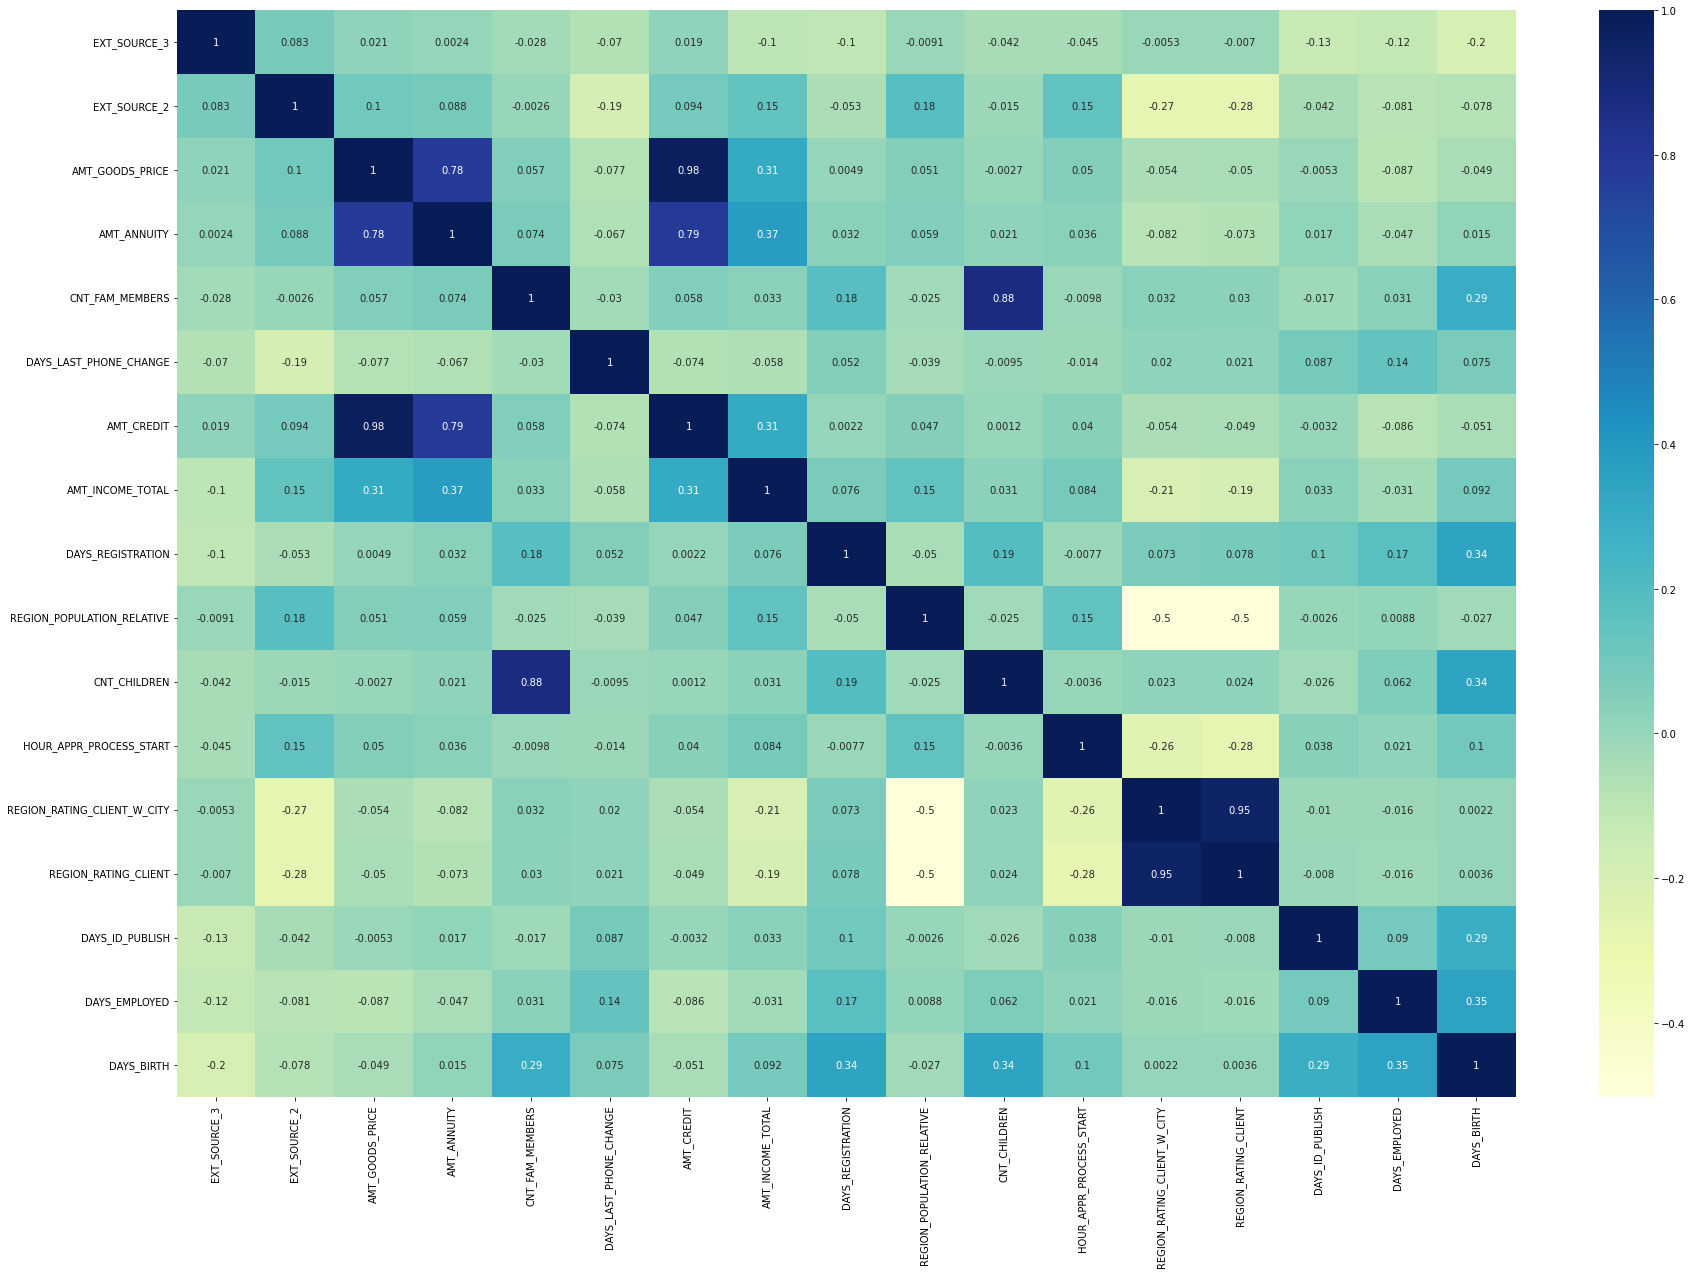

In [76]:
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(nondefaulters_correlation, cmap="YlGnBu", annot=True)
plt.show()

#### Analysis of Previous Application Dataset

In [77]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

 
previous_data = pd.read_csv('previous_application.csv')
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1.0,0.0,0.182832,0.867336,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1.0,NaN,NaN,NaN,XNA,Approved,-164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1.0,NaN,NaN,NaN,XNA,Approved,-301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1.0,NaN,NaN,NaN,XNA,Approved,-512.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1.0,NaN,NaN,NaN,Repairs,Refused,-781.0,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
previous_data.shape

(34180, 37)

In [79]:
df.dtypes.value_counts()

object     44
float64    23
int64       8
dtype: int64

In [80]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [81]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34180 entries, 0 to 34179
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   34180 non-null  int64  
 1   SK_ID_CURR                   34180 non-null  int64  
 2   NAME_CONTRACT_TYPE           34180 non-null  object 
 3   AMT_ANNUITY                  26894 non-null  float64
 4   AMT_APPLICATION              34180 non-null  float64
 5   AMT_CREDIT                   34180 non-null  float64
 6   AMT_DOWN_PAYMENT             16820 non-null  float64
 7   AMT_GOODS_PRICE              26778 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   34180 non-null  object 
 9   HOUR_APPR_PROCESS_START      34180 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  34180 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       34179 non-null  float64
 12  RATE_DOWN_PAYMENT            16819 non-null  float64
 13  RATE_INTEREST_PR

In [82]:
previous_data.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer', nan],
      dtype=object)

C:\Users\girik\.anaconda\anaconnda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


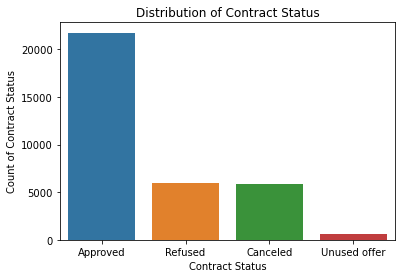

In [83]:
import matplotlib
sns.countplot(previous_data.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [84]:
prev_meta_data=meta_data(previous_data)
prev_meta_data.reset_index(drop=False).head(20)

,index,Total,Percent,Unique,Data_Type
0,RATE_INTEREST_PRIVILEGED,34075,99.692803,10,float64
1,RATE_INTEREST_PRIMARY,34075,99.692803,23,float64
2,RATE_DOWN_PAYMENT,17361,50.792861,7293,float64
3,AMT_DOWN_PAYMENT,17360,50.789936,3396,float64
4,NAME_TYPE_SUITE,16589,48.534231,7,object
5,NFLAG_INSURED_ON_APPROVAL,13165,38.516676,2,float64
6,DAYS_FIRST_DRAWING,13165,38.516676,825,float64
7,DAYS_FIRST_DUE,13165,38.516676,2866,float64
8,DAYS_LAST_DUE_1ST_VERSION,13165,38.516676,3853,float64
9,DAYS_LAST_DUE,13165,38.516676,2714,float64


In [85]:
cols_to_keep=list(prev_meta_data[(prev_meta_data.Percent<55)].index)
previous_data=previous_data[cols_to_keep]
previous_data.describe()

,RATE_DOWN_PAYMENT,AMT_DOWN_PAYMENT,NFLAG_INSURED_ON_APPROVAL,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,AMT_GOODS_PRICE,CNT_PAYMENT,AMT_ANNUITY,SELLERPLACE_AREA,DAYS_DECISION,NFLAG_LAST_APPL_IN_DAY,SK_ID_CURR,HOUR_APPR_PROCESS_START,AMT_CREDIT,AMT_APPLICATION,SK_ID_PREV
count,16819.000000,16820.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,2.677800e+04,26893.000000,26894.000000,3.417900e+04,34179.000000,34179.000000,34180.000000,34180.000000,3.418000e+04,3.418000e+04,3.418000e+04
mean,0.079391,6541.418568,0.323436,344487.016227,14109.971592,31403.663431,75506.090126,80625.598906,2.170645e+05,15.612018,15557.385945,4.483962e+02,-900.634132,0.996606,279106.407987,12.470246,1.900473e+05,1.700302e+05,1.920308e+06
std,0.108625,16177.234838,0.467799,84682.726736,73107.597668,103512.451138,148891.555701,152411.710274,3.043352e+05,14.056321,14486.014004,2.167979e+04,785.636327,0.058159,102729.325621,3.333930,3.109210e+05,2.837916e+05,5.355968e+05
min,0.000000,0.000000,0.000000,-2908.000000,-2891.000000,-2800.000000,-2850.000000,-2844.000000,0.000000e+00,0.000000,0.000000,-1.000000e+00,-2922.000000,0.000000,100007.000000,0.000000,0.000000e+00,0.000000e+00,1.000009e+06
25%,0.000000,0.000000,0.000000,365243.000000,-1642.000000,-1271.000000,-1340.000000,-1297.000000,4.968338e+04,6.000000,6185.846250,-1.000000e+00,-1338.000000,1.000000,189999.000000,10.000000,2.590088e+04,2.159438e+04,1.456231e+06
50%,0.046218,1451.250000,0.000000,365243.000000,-823.000000,-368.000000,-539.000000,-502.000000,1.047690e+05,12.000000,10937.160000,1.000000e+01,-600.000000,1.000000,278956.500000,12.000000,7.966575e+04,7.191000e+04,1.916356e+06
75%,0.108909,7875.000000,1.000000,365243.000000,-409.000000,109.000000,-78.000000,-50.000000,2.250000e+05,18.000000,19839.993750,1.000000e+02,-294.000000,1.000000,368752.500000,15.000000,1.998079e+05,1.800000e+05,2.387095e+06
max,0.944776,509850.000000,1.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,3.150000e+06,60.000000,210115.485000,4.000000e+06,-2.000000,1.000000,456254.000000,23.000000,4.104351e+06,3.150000e+06,2.845367e+06


In [86]:
low_missing=pd.DataFrame(prev_meta_data[(prev_meta_data.Percent>0)&(prev_meta_data.Percent<15)])
low_missing

,Total,Percent,Unique,Data_Type
PRODUCT_COMBINATION,7,0.020480,17,object
CHANNEL_TYPE,1,0.002926,8,object
NAME_PRODUCT_TYPE,1,0.002926,3,object
NAME_YIELD_GROUP,1,0.002926,5,object
SELLERPLACE_AREA,1,0.002926,1065,float64
NAME_SELLER_INDUSTRY,1,0.002926,11,object
NAME_GOODS_CATEGORY,1,0.002926,26,object
NAME_PORTFOLIO,1,0.002926,5,object
NAME_PAYMENT_TYPE,1,0.002926,4,object
NAME_CLIENT_TYPE,1,0.002926,4,object


In [87]:
cols_to_convert=list(prev_meta_data[(prev_meta_data.Unique==2)&((prev_meta_data.Data_Type=="int64")|(prev_meta_data.Data_Type=="float64"))].index)
cols_to_convert

['NFLAG_INSURED_ON_APPROVAL', 'NFLAG_LAST_APPL_IN_DAY']

In [88]:
def convert_data(previous_data, cols_to_convert):
    for y in cols_to_convert:
        previous_data.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return previous_data
convert_data(previous_data, cols_to_convert)
previous_data.dtypes.value_counts()

object     18
float64    14
int64       3
dtype: int64

In [89]:
approved=previous_data[previous_data.NAME_CONTRACT_STATUS=='Approved']
refused=previous_data[previous_data.NAME_CONTRACT_STATUS=='Refused']
canceled=previous_data[previous_data.NAME_CONTRACT_STATUS=='Canceled']
unused=previous_data[previous_data.NAME_CONTRACT_STATUS=='Unused Offer']

In [90]:
percentage_approved=(len(approved)*100)/len(previous_data)
percentage_refused=(len(refused)*100)/len(previous_data)
percentage_canceled=(len(canceled)*100)/len(previous_data)
percentage_unused=(len(unused)*100)/len(previous_data)

print("The Percentage of people whose loans have been Approved is:",round(percentage_approved,2),"%")
print("The Percentage of people whose loans have been Refused is:",round(percentage_refused,2),"%")
print("The Percentage of people whose loans have been Canceled is:",round(percentage_canceled,2),"%")
print("The Percentage of people whose loans have been Unused is:",round(percentage_unused,2),"%")

The Percentage of people whose loans have been Approved is: 63.6 %
The Percentage of people whose loans have been Refused is: 17.45 %
The Percentage of people whose loans have been Canceled is: 17.26 %
The Percentage of people whose loans have been Unused is: 0.0 %


In [91]:
def plot_3charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,30))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

In [92]:
previous_data.select_dtypes('object').columns

Index(['NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL', 'PRODUCT_COMBINATION',
       'CHANNEL_TYPE', 'NAME_PRODUCT_TYPE', 'NAME_YIELD_GROUP',
       'NAME_SELLER_INDUSTRY', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CONTRACT_STATUS', 'NAME_CASH_LOAN_PURPOSE',
       'NFLAG_LAST_APPL_IN_DAY', 'FLAG_LAST_APPL_PER_CONTRACT',
       'WEEKDAY_APPR_PROCESS_START', 'NAME_CONTRACT_TYPE'],
      dtype='object')

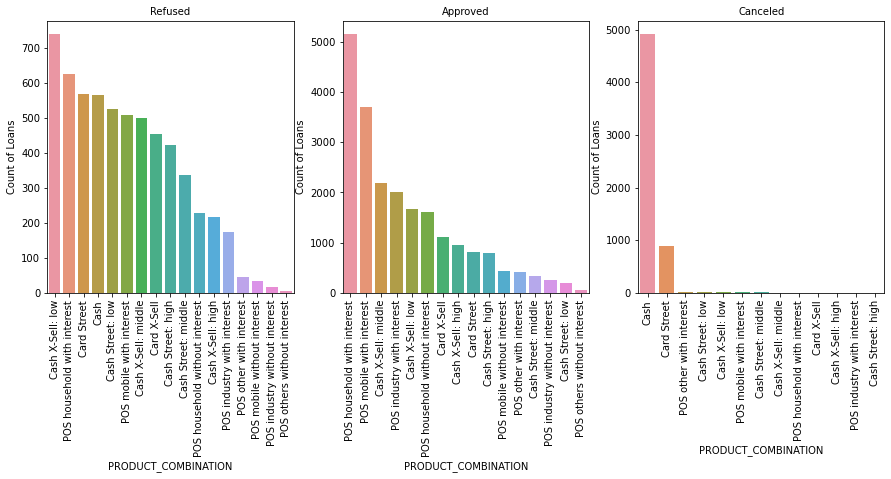

In [93]:
plot_3charts('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)

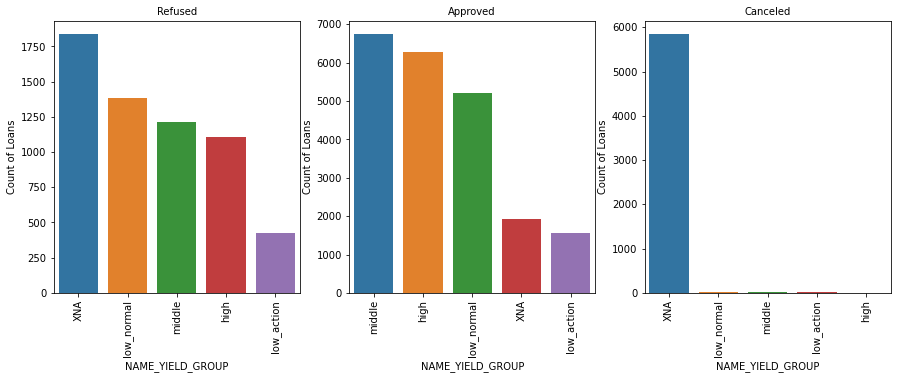

In [94]:
plot_3charts('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)

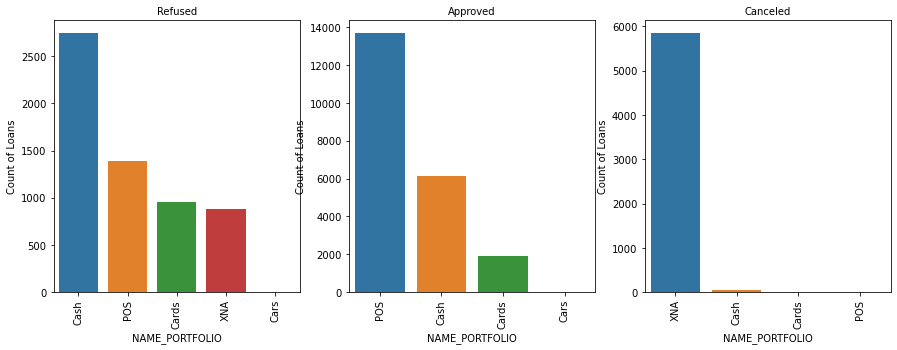

In [95]:
plot_3charts('NAME_PORTFOLIO', label_rotation=True,horizontal_layout=True)

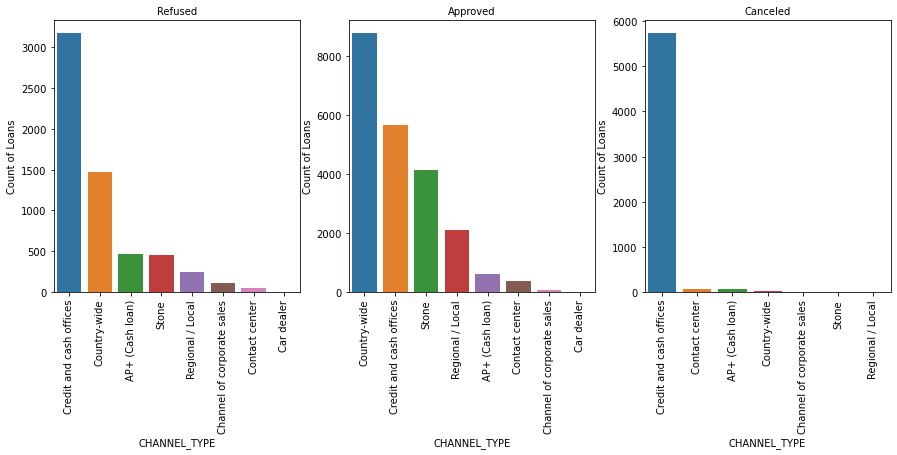

In [96]:
plot_3charts('CHANNEL_TYPE', label_rotation=True,horizontal_layout=True)

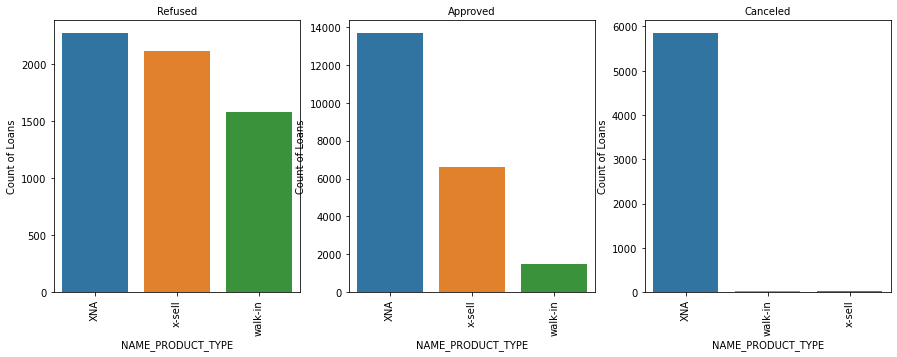

In [97]:
plot_3charts('NAME_PRODUCT_TYPE', label_rotation=True,horizontal_layout=True)

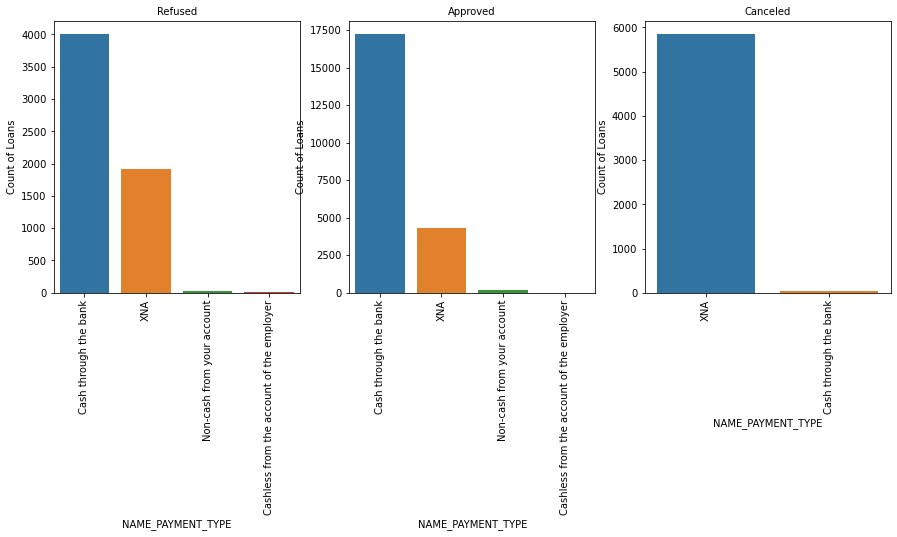

In [98]:
plot_3charts('NAME_PAYMENT_TYPE', label_rotation=True,horizontal_layout=True)

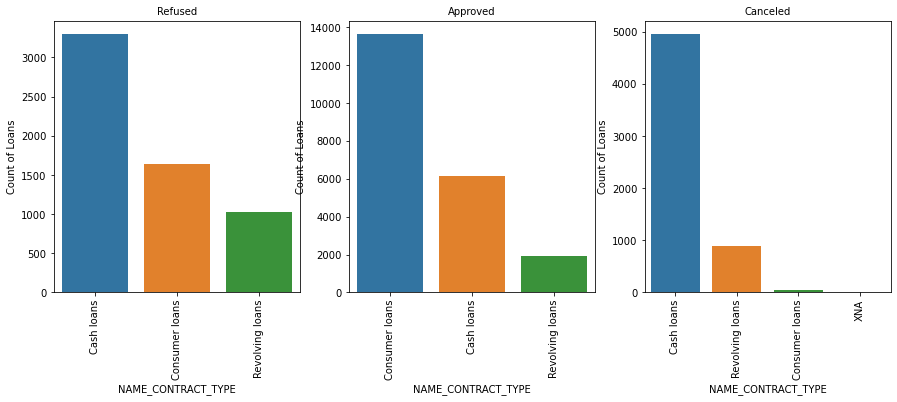

In [99]:
plot_3charts('NAME_CONTRACT_TYPE', label_rotation=True,horizontal_layout=True)

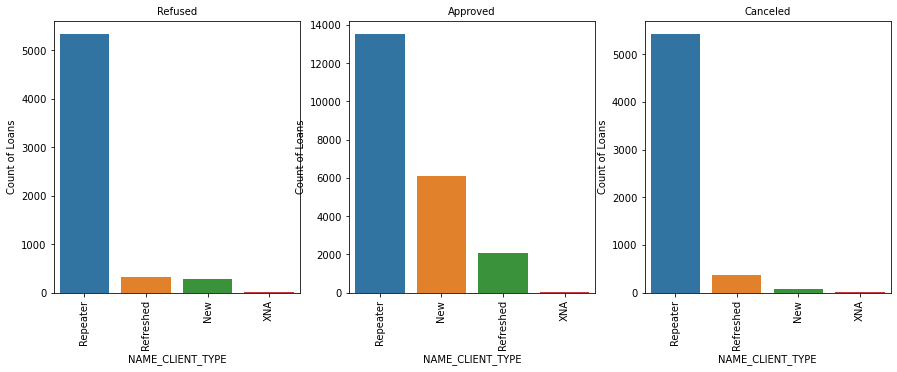

In [100]:
plot_3charts('NAME_CLIENT_TYPE', label_rotation=True,horizontal_layout=True)

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

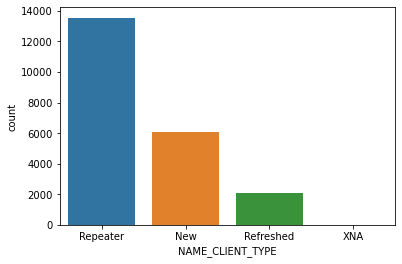

In [101]:
sns.countplot(x=approved['NAME_CLIENT_TYPE'], data=previous_data)

#### Removing Outliers

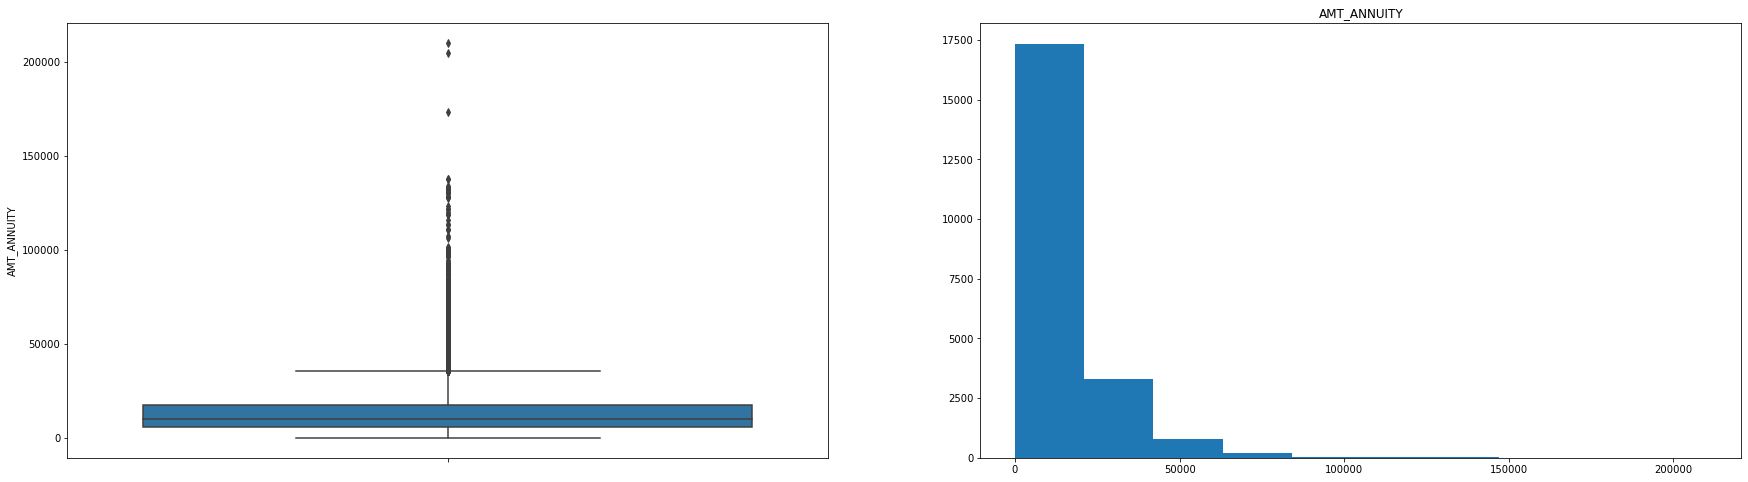

In [102]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_ANNUITY']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

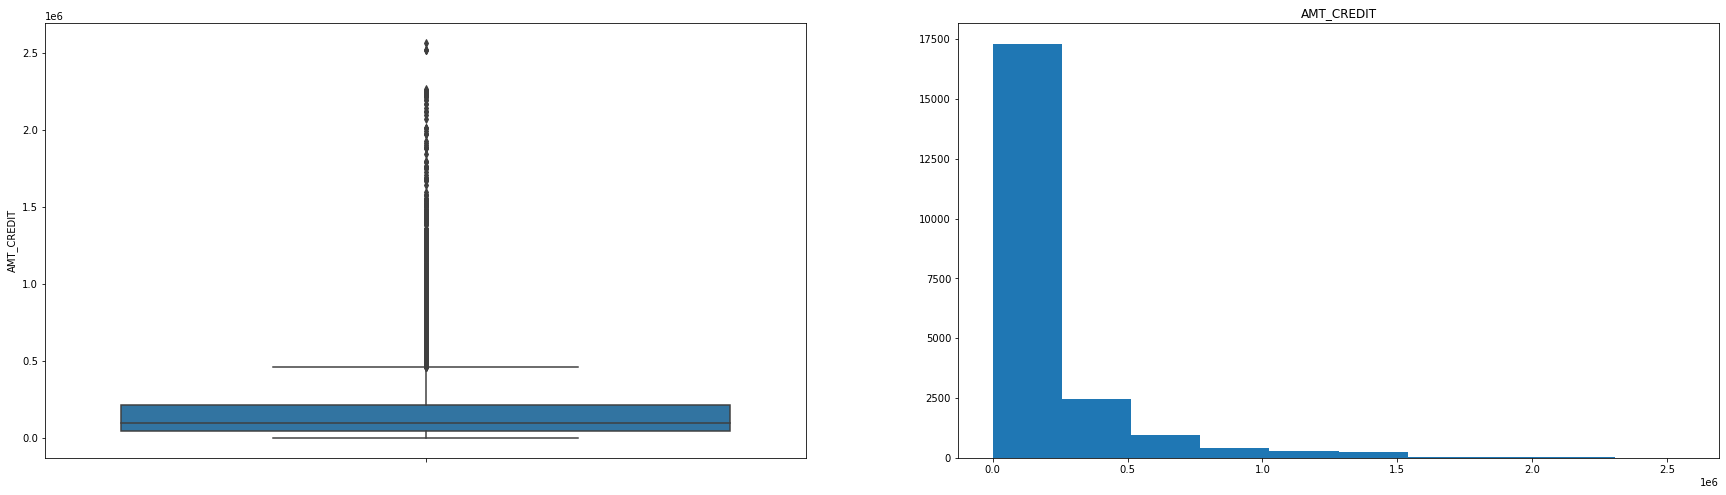

In [103]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_CREDIT']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()

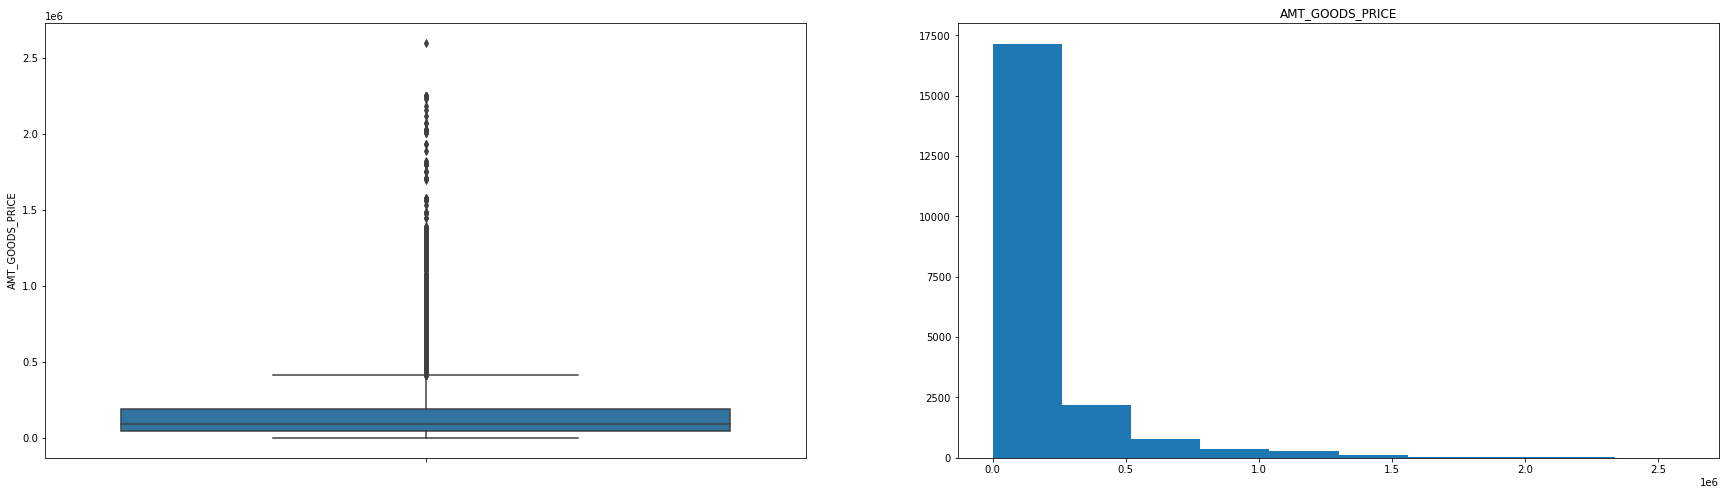

In [104]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_GOODS_PRICE']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')
plt.show()

#### BIVARIATE ANALYSIS OF VARIABLES 

In [105]:
cols_approved=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
approved_num=approved[cols_approved]

In [106]:
cols_refused=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
refused_num=refused[cols_refused]

In [107]:
#calculating correlation for approved
approved_correlation = approved_num.corr()
round(approved_correlation, 3)

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.000,0.611,-0.052,-0.054,0.004,-0.026,-0.007,0.390,0.259,-0.025,0.227,-0.038,0.390
RATE_DOWN_PAYMENT,0.611,1.000,-0.150,-0.154,0.003,-0.049,-0.024,-0.103,-0.110,-0.296,-0.225,-0.214,-0.103
DAYS_TERMINATION,-0.052,-0.150,1.000,0.931,0.482,0.336,-0.380,0.217,0.073,0.076,0.223,0.413,0.165
DAYS_LAST_DUE,-0.054,-0.154,0.931,1.000,0.415,0.409,-0.243,0.219,0.083,0.107,0.229,0.454,0.187
DAYS_LAST_DUE_1ST_VERSION,0.004,0.003,0.482,0.415,1.000,0.528,-0.791,0.016,-0.068,-0.373,0.043,0.103,-0.075
DAYS_FIRST_DUE,-0.026,-0.049,0.336,0.409,0.528,1.000,-0.002,-0.027,-0.066,-0.204,-0.009,0.184,-0.050
DAYS_FIRST_DRAWING,-0.007,-0.024,-0.380,-0.243,-0.791,-0.002,1.000,-0.029,0.043,0.299,-0.044,-0.024,0.064
AMT_GOODS_PRICE,0.390,-0.103,0.217,0.219,0.016,-0.027,-0.029,1.000,0.837,0.629,0.994,0.253,1.000
AMT_ANNUITY,0.259,-0.110,0.073,0.083,-0.068,-0.066,0.043,0.837,1.000,0.338,0.830,0.250,0.821
CNT_PAYMENT,-0.025,-0.296,0.076,0.107,-0.373,-0.204,0.299,0.629,0.338,1.000,0.623,0.182,0.638


In [108]:
c1=approved_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

AMT_DOWN_PAYMENT  AMT_DOWN_PAYMENT    1.000000
AMT_CREDIT        AMT_GOODS_PRICE     0.994189
AMT_APPLICATION   AMT_CREDIT          0.964714
DAYS_LAST_DUE     DAYS_TERMINATION    0.931060
AMT_GOODS_PRICE   AMT_ANNUITY         0.836538
AMT_CREDIT        AMT_ANNUITY         0.830167
AMT_APPLICATION   AMT_ANNUITY         0.821191
                  CNT_PAYMENT         0.637828
AMT_GOODS_PRICE   CNT_PAYMENT         0.628855
CNT_PAYMENT       AMT_CREDIT          0.622659
dtype: float64

In [109]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

RATE_DOWN_PAYMENT          DAYS_TERMINATION            -0.149799
DAYS_LAST_DUE              RATE_DOWN_PAYMENT           -0.153546
DAYS_FIRST_DUE             CNT_PAYMENT                 -0.203975
RATE_DOWN_PAYMENT          DAYS_DECISION               -0.213869
AMT_CREDIT                 RATE_DOWN_PAYMENT           -0.224643
DAYS_FIRST_DRAWING         DAYS_LAST_DUE               -0.242742
RATE_DOWN_PAYMENT          CNT_PAYMENT                 -0.296131
DAYS_LAST_DUE_1ST_VERSION  CNT_PAYMENT                 -0.373223
DAYS_FIRST_DRAWING         DAYS_TERMINATION            -0.379690
                           DAYS_LAST_DUE_1ST_VERSION   -0.790522
dtype: float64

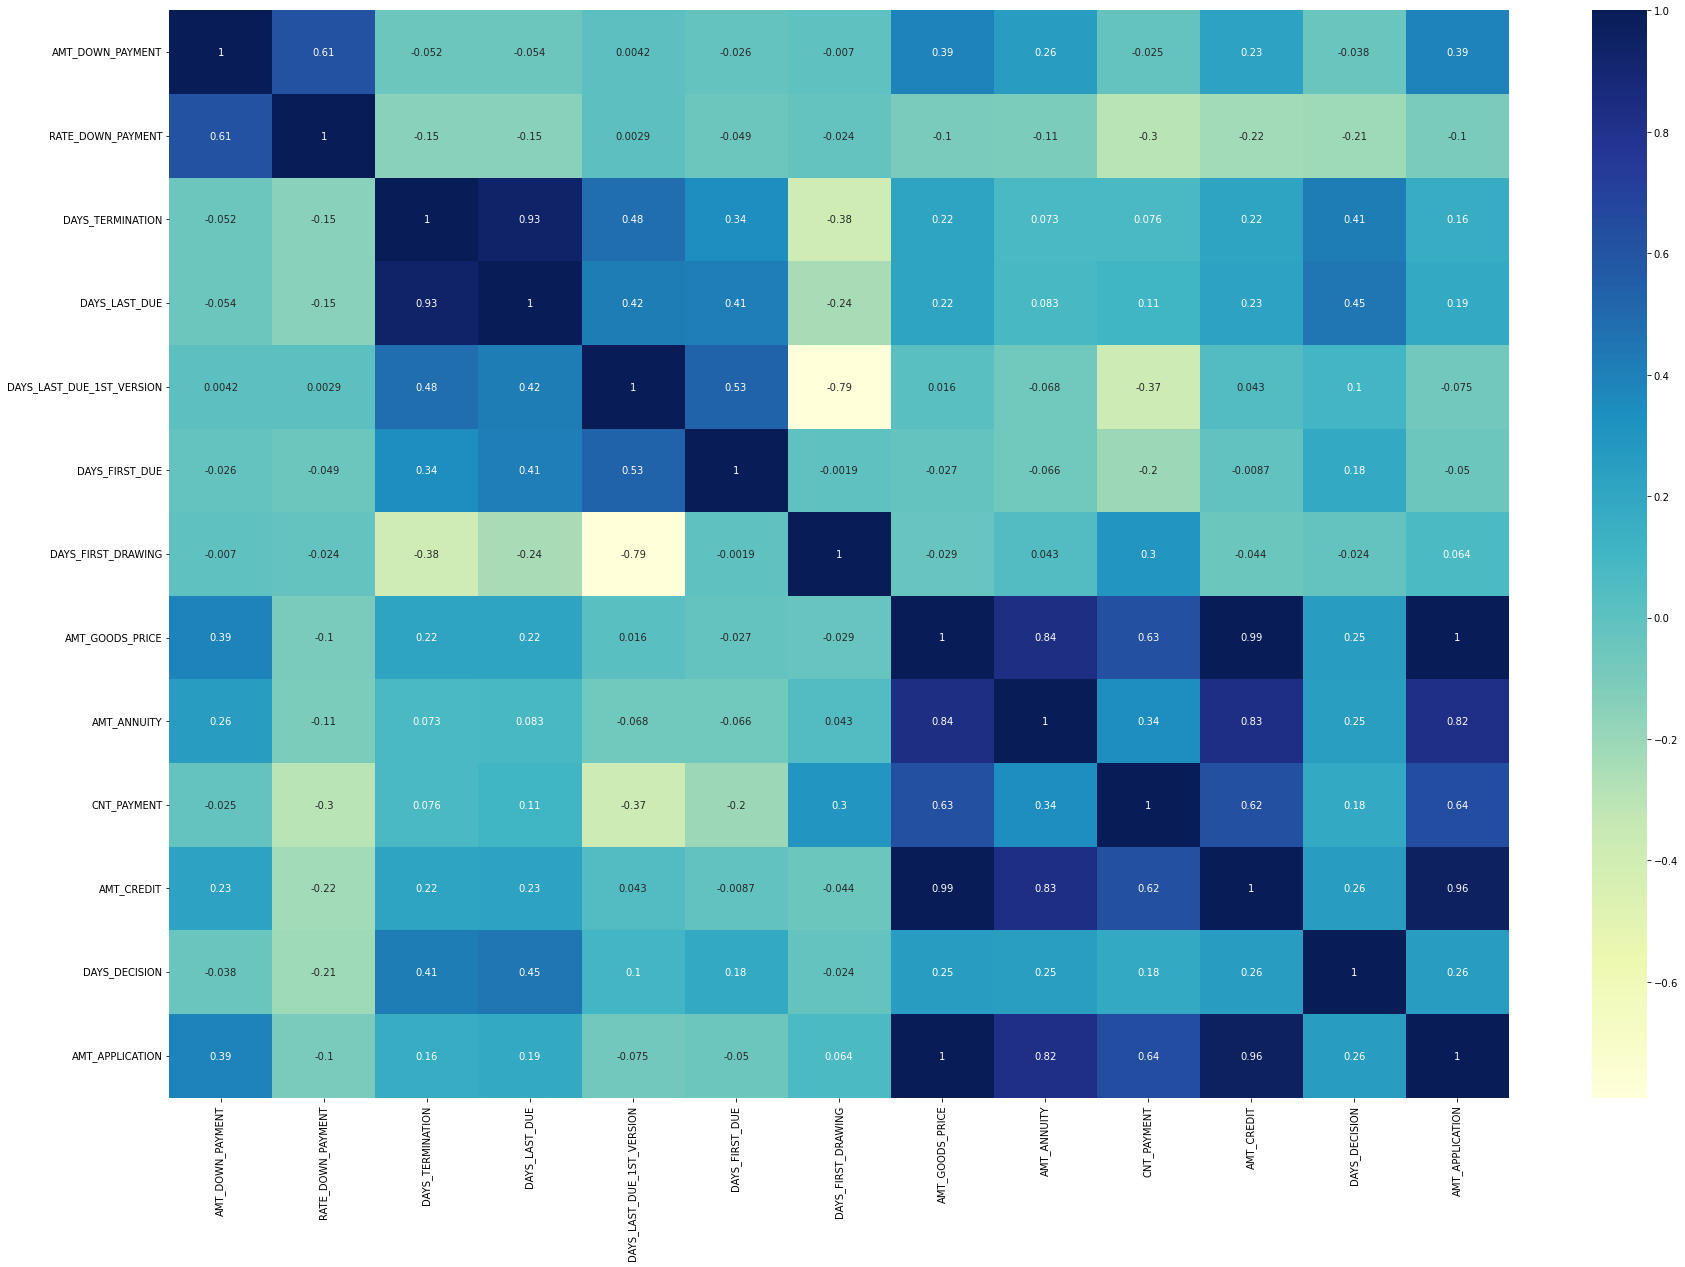

In [110]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(approved_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [111]:
#calculating correlation for approved
refused_correlation = refused_num.corr()
round(refused_correlation, 3)

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.000,0.494,0.557,0.352,0.089,0.417,-0.033,0.557
RATE_DOWN_PAYMENT,0.494,1.000,-0.016,-0.076,-0.227,-0.113,-0.286,-0.016
AMT_GOODS_PRICE,0.557,-0.016,1.000,0.846,0.659,0.992,0.324,1.000
AMT_ANNUITY,0.352,-0.076,0.846,1.000,0.448,0.843,0.292,0.837
CNT_PAYMENT,0.089,-0.227,0.659,0.448,1.000,0.676,0.293,0.670
AMT_CREDIT,0.417,-0.113,0.992,0.843,0.676,1.000,0.261,0.983
DAYS_DECISION,-0.033,-0.286,0.324,0.292,0.293,0.261,1.000,0.251
AMT_APPLICATION,0.557,-0.016,1.000,0.837,0.670,0.983,0.251,1.000


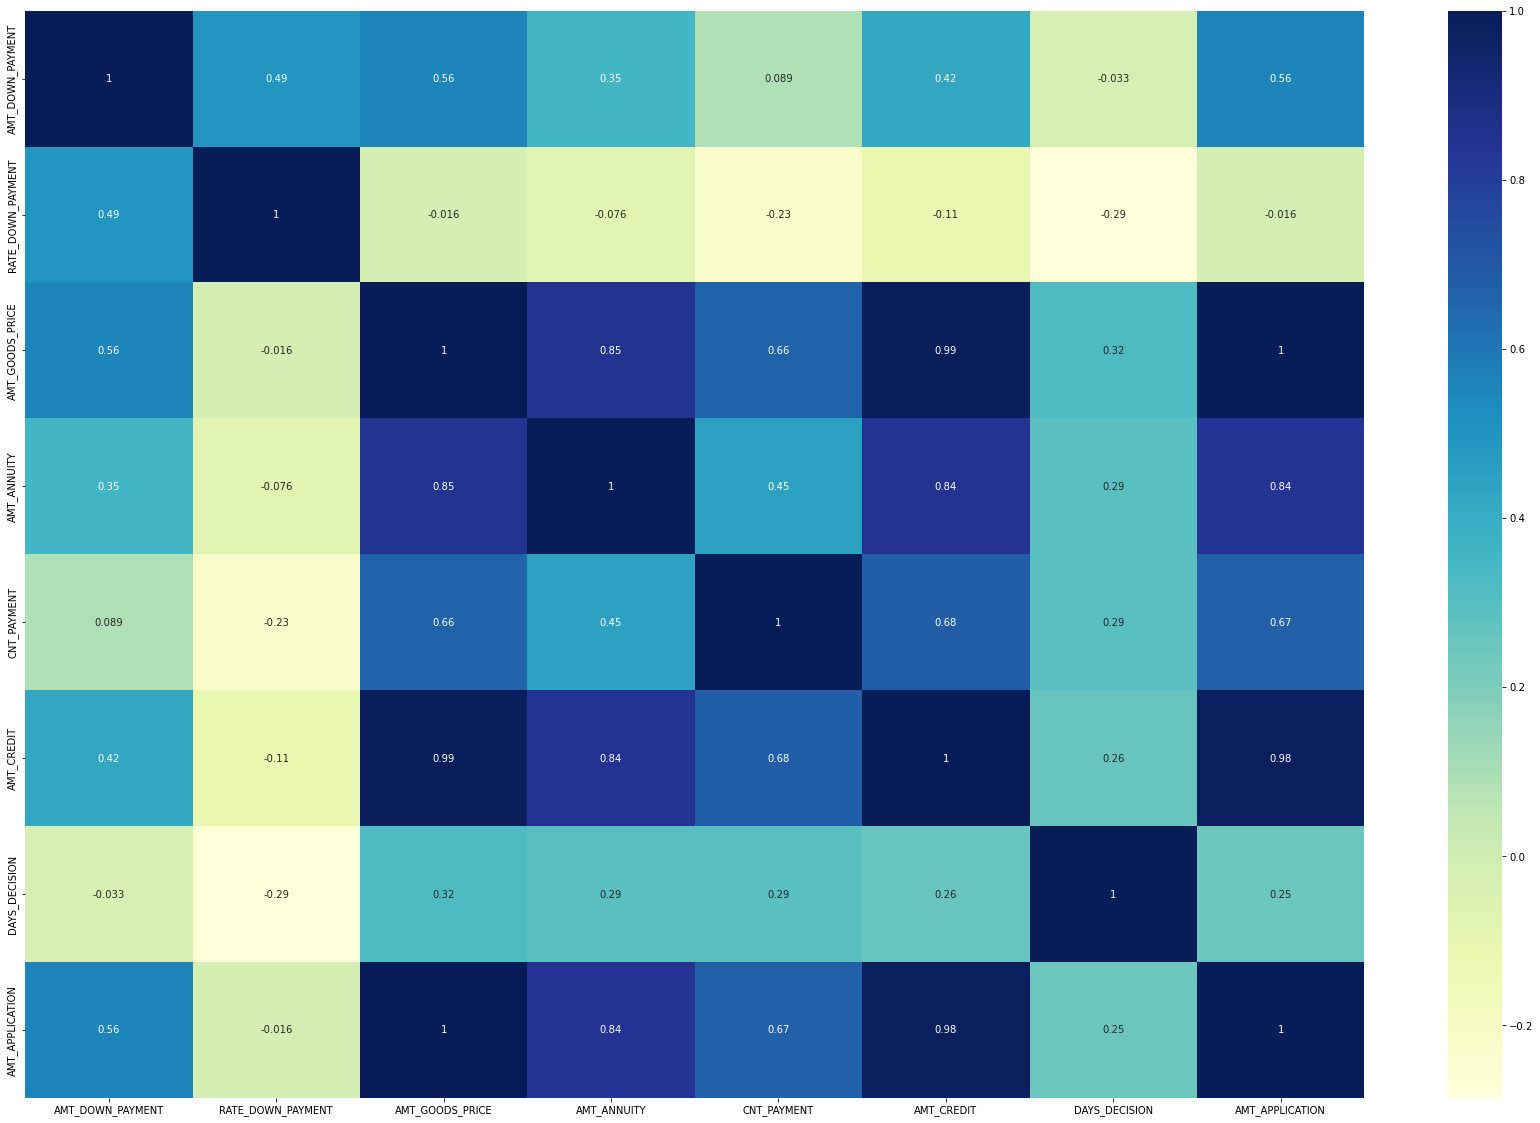

In [112]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(refused_correlation, cmap="YlGnBu", annot=True)
plt.show()



In [113]:
c2=refused_correlation.unstack()
c2.sort_values(ascending=False).drop_duplicates().head(10)


AMT_DOWN_PAYMENT  AMT_DOWN_PAYMENT    1.000000
AMT_GOODS_PRICE   AMT_APPLICATION     0.999646
                  AMT_CREDIT          0.992191
AMT_CREDIT        AMT_APPLICATION     0.982595
AMT_ANNUITY       AMT_GOODS_PRICE     0.846465
AMT_CREDIT        AMT_ANNUITY         0.842735
AMT_ANNUITY       AMT_APPLICATION     0.837097
CNT_PAYMENT       AMT_CREDIT          0.676140
AMT_APPLICATION   CNT_PAYMENT         0.670343
AMT_GOODS_PRICE   CNT_PAYMENT         0.658694
dtype: float64

In [114]:
c2.sort_values(ascending=False).drop_duplicates().tail(10)

AMT_ANNUITY       DAYS_DECISION        0.292193
DAYS_DECISION     AMT_CREDIT           0.260739
                  AMT_APPLICATION      0.250719
AMT_DOWN_PAYMENT  CNT_PAYMENT          0.088881
AMT_GOODS_PRICE   RATE_DOWN_PAYMENT   -0.015903
DAYS_DECISION     AMT_DOWN_PAYMENT    -0.032587
AMT_ANNUITY       RATE_DOWN_PAYMENT   -0.075856
AMT_CREDIT        RATE_DOWN_PAYMENT   -0.112825
CNT_PAYMENT       RATE_DOWN_PAYMENT   -0.227018
DAYS_DECISION     RATE_DOWN_PAYMENT   -0.286156
dtype: float64

In [115]:
def has_terminated(x):
    if x < 0:
        return 'Loan Terminated'
    else:
        return 'Loan Open'
    
approved['CURRENT_STATUS'] = approved['DAYS_TERMINATION'].apply(has_terminated) 

C:\Users\girik\AppData\Local\Temp\ipykernel_2052\1448134333.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approved['CURRENT_STATUS'] = approved['DAYS_TERMINATION'].apply(has_terminated)


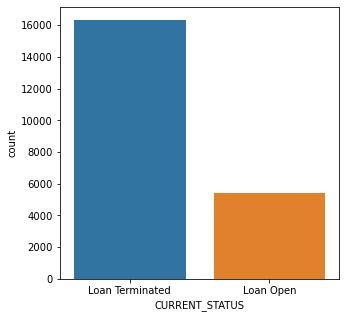

In [116]:
plt.figure(figsize=(5,5))
sns.countplot(x=approved['CURRENT_STATUS'], data=approved)
plt.show()

In [117]:
new_df= previous_data.pivot_table(values = 'NAME_CONTRACT_STATUS', index = 'SK_ID_CURR', aggfunc = 'count')
new_df=new_df.reset_index(drop=False)
new_df.rename(columns = {'NAME_CONTRACT_STATUS':'Count of Refused Loans'}, inplace = True)


In [118]:
merged_df1=pd.merge(new_df, pd.DataFrame(df[['SK_ID_CURR','TARGET']]), how='inner', on='SK_ID_CURR')

In [119]:
merged_df1=merged_df1[merged_df1['Count of Refused Loans']!=0]

In [123]:
merged_df1.head()

,SK_ID_CURR,Count of Refused Loans,TARGET
0,100007,1,0
1,100009,1,0
2,100026,1,0
3,100035,1,0
4,100043,1,0


In [121]:
merged_df1[merged_df1['TARGET']==0].head()

,SK_ID_CURR,Count of Refused Loans,TARGET
0,100007,1,0
1,100009,1,0
2,100026,1,0
3,100035,1,0
4,100043,1,0


# Conclusion
1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and
‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for
successful payments.
2. Banks should focus less on income type ‘Working’ as they are having
most number of unsuccessful payments.
3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful
payments on time.
4. Get as much as clients from housing type ‘With parents’ as they are
having least number of unsuccessful payments